# Effect of automation on complexity behavior

## Setup

In [183]:
import process_simulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter

## Perform and plot simulations for exploratory analysis

In [184]:
# set configuration for non-automated process, no exceptions
t = 5000 # number of iterations (5000 default)
l = 100 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 50 # number of historic sequences remembered
n = 5

# set variability metrics
v_m = 0.005
v_a = 0
v_m_e = 0.01
v_a_e = 0.03

# set automation degree and exception percentage 
a = 0
e = 0

# set the seed to an integer value for reproducibility
seed = 1

simulation_models = {}

simulation_models['Scenario A: No Automation, No Exceptions'] = process_simulation.ProcessSimulationModel(t, l, m, r, n, v_m=v_m, v_a=v_a, v_m_e=v_m_e, v_a_e=v_a_e, a=a, e=e, seed=seed)
a = 0.5
simulation_models['Scenario B: Partial Automation, No Exceptions'] = process_simulation.ProcessSimulationModel(t, l, m, r, n, v_m=v_m, v_a=v_a, v_m_e=v_m_e, v_a_e=v_a_e, a=a, e=e, seed=seed)
e = 0.2
a = 0
simulation_models['Scenario C: No Automation, Exceptions'] = process_simulation.ProcessSimulationModel(t, l, m, r, n, v_m=v_m, v_a=v_a, v_m_e=v_m_e, v_a_e=v_a_e, a=a, e=e, seed=seed)
a = 0.5
simulation_models['Scenario D: Partial Automation, Exceptions'] = process_simulation.ProcessSimulationModel(t, l, m, r, n, v_m=v_m, v_a=v_a, v_m_e=v_m_e, v_a_e=v_a_e, a=a, e=e, seed=seed)

In [185]:
# run all simulations
simulation_ams_dict = {sim_name: simulation.run_simulation() for sim_name, simulation in simulation_models.items()}
simluation_metrics_over_time_dict = {sim_name: process_simulation.get_metrics_for_sim_results(sim_ams, metrics=['number of connected nodes', 'number of edges', 'density', 'avg degree', 'est. count simple paths']) for sim_name, sim_ams in simulation_ams_dict.items()}

# Initialize the MinMaxScaler
def norm_df(df):
    normed_df = pd.DataFrame()

    # normalize all complexity metrics to plot them in one graph and observe their differences
    def absolute_maximum_scale(series):
        return series / series.abs().max()
    for col in df.columns:
        normed_df[col] = absolute_maximum_scale(df[col])
    return normed_df

norm_simluation_metrics_over_time_dict = {sim_name: norm_df(simluation_metrics_over_time) for sim_name, simluation_metrics_over_time in simluation_metrics_over_time_dict.items()}

simulation_metrics_summary_dict = {sim_name: process_simulation.get_aggregate_sim_result(sim_ams) for sim_name, sim_ams in simulation_ams_dict.items()}

Complexity Over Time, Plots at different linear scales


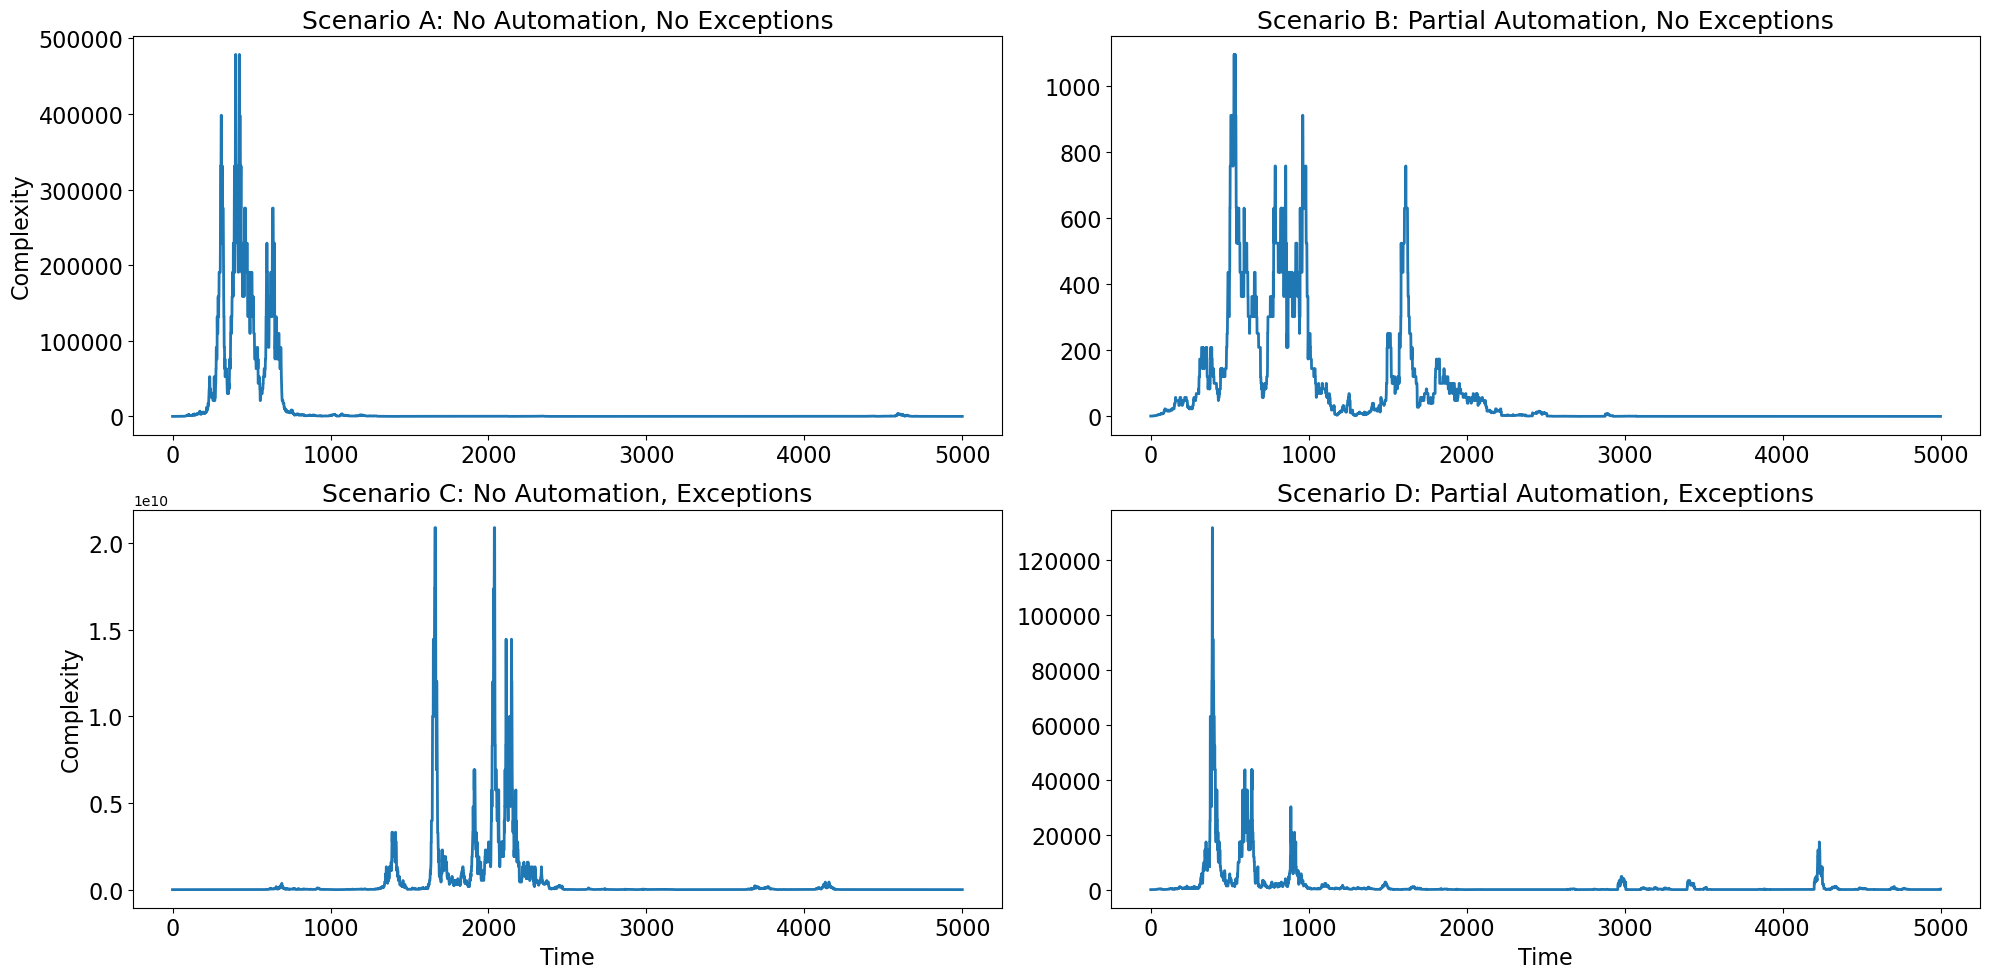

In [186]:
# print complexity over time
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

print("Complexity Over Time, Plots at different linear scales")
# fig.suptitle('Complexity Over Time, Plots at different linear scales', fontsize=20)

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, (ax, (sim_name, metrics)) in enumerate(zip(axs, simluation_metrics_over_time_dict.items())):
    metrics[['est. count simple paths']].plot(ax=ax, title=sim_name, fontsize=16, linewidth=2)
    ax.set_title(sim_name, fontsize=18)
    if i % 2 == 0:
        ax.set_ylabel("Complexity", fontsize=16)
    if i >= 2:
        ax.set_xlabel("Time", fontsize=16)
    else:
        ax.set_xlabel("")
    ax.get_legend().remove()

# Add a legend box below the graph
lines, labels = axs[0].get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('experiment_results/plot_complexity_subplots.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [187]:
# print times at which max. complexity is reached, per scenario
for sim_name, metrics in simluation_metrics_over_time_dict.items():
    print(sim_name)
    max_value = metrics['est. count simple paths'].max()
    max_index = metrics['est. count simple paths'].idxmax()
    min_value = metrics['est. count simple paths'].min()
    min_index = metrics['est. count simple paths'].idxmin()
    median_value = metrics['est. count simple paths'].median()
    print(f"Min complexity: {min_value:,.5f}, Time step: {min_index}")
    print(f"Median complexity: {median_value:,.1f}")
    print(f"Max complexity: {max_value:,.1f}, Time step: {max_index}")
    print()

Scenario A: No Automation, No Exceptions
Min complexity: 0.00398, Time step: 3925
Median complexity: 22.9
Max complexity: 478,630.1, Time step: 400

Scenario B: Partial Automation, No Exceptions
Min complexity: 0.00010, Time step: 3572
Median complexity: 1.7
Max complexity: 1,096.5, Time step: 528

Scenario C: No Automation, Exceptions
Min complexity: 1.00000, Time step: 0
Median complexity: 7,585,775.8
Max complexity: 20,892,961,308.5, Time step: 1661

Scenario D: Partial Automation, Exceptions
Min complexity: 0.10965, Time step: 2148
Median complexity: 83.2
Max complexity: 131,825.7, Time step: 390



Complexity Over Time, Plots at comparable log scales


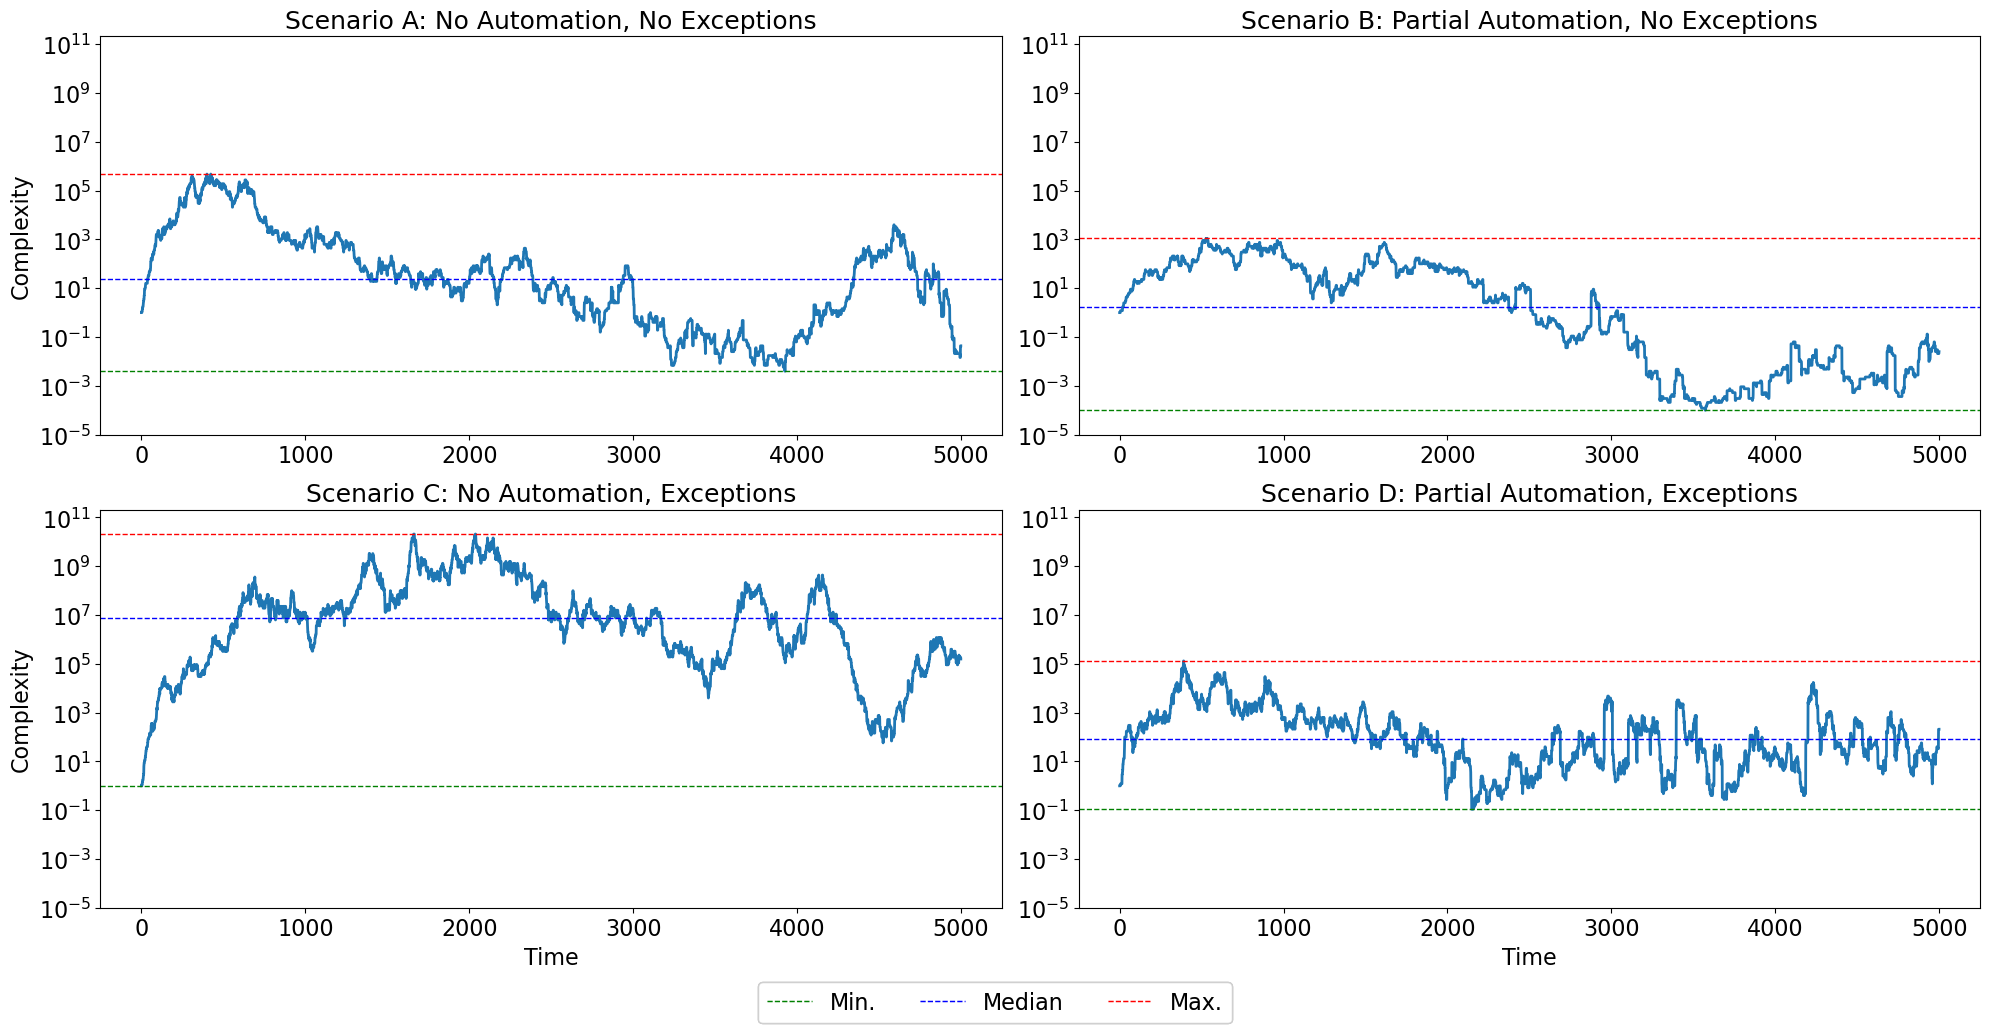

In [188]:
# print complexity over time
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
print("Complexity Over Time, Plots at comparable log scales")
# fig.suptitle('Complexity Over Time, Plots at comparable log scales', fontsize=20)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Determine the common y-axis limits
y_min = min(metrics['est. count simple paths'].min() for metrics in simluation_metrics_over_time_dict.values()) * 0.1
y_max = max(metrics['est. count simple paths'].max() for metrics in simluation_metrics_over_time_dict.values()) * 10

for i, (ax, (sim_name, metrics)) in enumerate(zip(axs, simluation_metrics_over_time_dict.items())):
    metrics[['est. count simple paths']].plot(ax=ax, title=sim_name, fontsize=16, linewidth=2)
    ax.axhline(y=metrics['est. count simple paths'].min(), color='green', linestyle='--', linewidth=1, label='Min.')
    ax.axhline(y=metrics['est. count simple paths'].median(), color='blue', linestyle='--', linewidth=1, label='Median')
    ax.axhline(y=metrics['est. count simple paths'].max(), color='red', linestyle='--', linewidth=1, label='Max.')
    # Add a legend box below the graph
    lines, labels = axs[0].get_legend_handles_labels()
    fig.legend(lines[1:], labels[1:], loc='lower center', fontsize=16, ncol=4, bbox_to_anchor=(0.5, -0.05))
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_title(sim_name, fontsize=18, pad=20)  # Add vertical space between rows
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_title(sim_name, fontsize=18)
    if i % 2 == 0:
        ax.set_ylabel("Complexity", fontsize=16)
    if i >= 2:
        ax.set_xlabel("Time", fontsize=16)
    else:
        ax.set_xlabel("")
    ax.get_legend().remove()


plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('experiment_results/plot_complexity_subplots_log_scale.pdf', dpi=300, bbox_inches='tight')
plt.show()


History Matrices for Scenario A: No Automation, No Exceptions


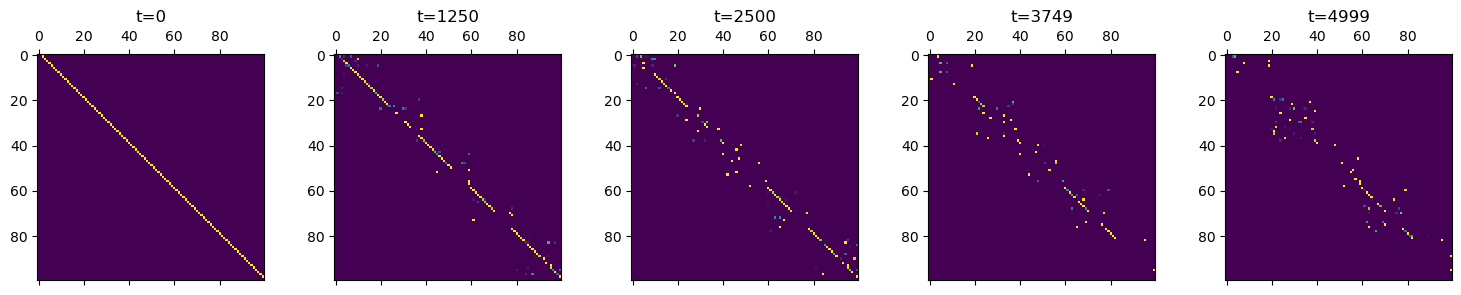

History Matrices for Scenario B: Partial Automation, No Exceptions


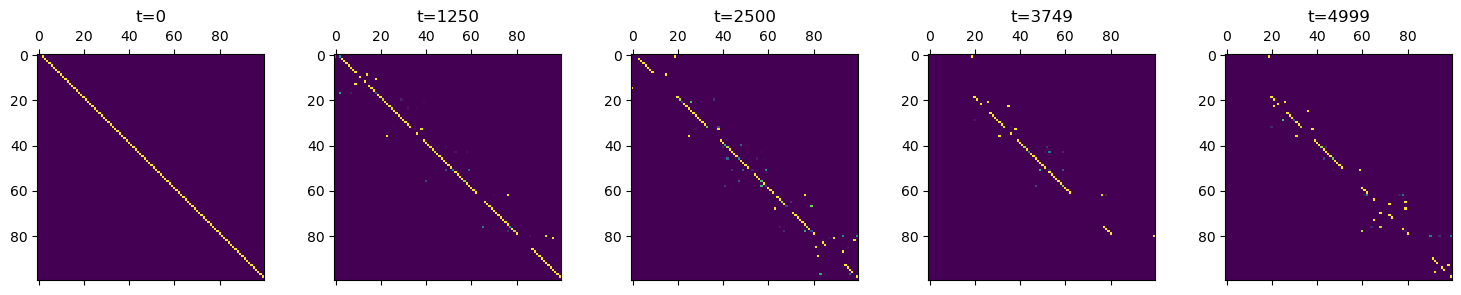

History Matrices for Scenario C: No Automation, Exceptions


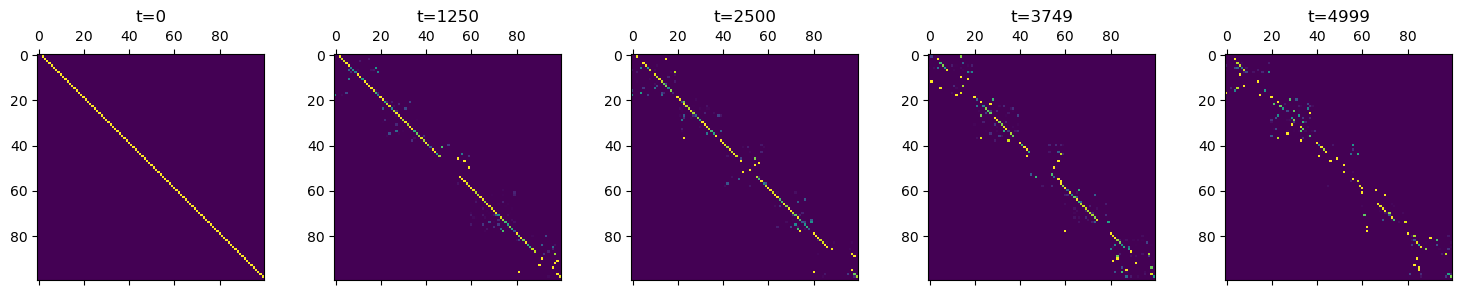

History Matrices for Scenario D: Partial Automation, Exceptions


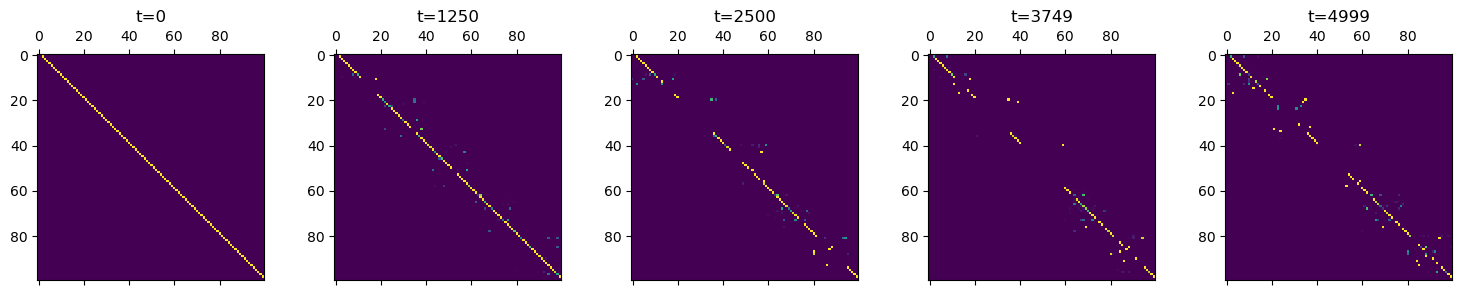

In [189]:
for sim_name, sim_ams in simulation_ams_dict.items():
    print(f"History Matrices for {sim_name}")
    plt = process_simulation.get_heatmap_plot(sim_ams, 5, 1, title=None)
    sim_name_clean = sim_name.replace(',', '').replace(':', '').replace(' ', '_')
    plt.savefig(f'experiment_results/heatmaps_{sim_name_clean}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

## Load computed simulations

## Analyze results

### Read simulation results from df

In [190]:
simulation_results_df = process_simulation.get_results_dataframe("experiment_results/simulation_results_5.csv")

# delete results from old version
filtered_df = simulation_results_df.loc[
     (simulation_results_df['e'].isin([0, 0.2, 0.4, 0.6, 0.8, 1]))
]

aggregated_df = process_simulation.aggregate_results(filtered_df)

display(aggregated_df)

simulation_runs max_complexity  \
                                                        count           mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                    
5000 100 5 50 5 0.005 0   0.01  0.03  0.0 0.0             500   6.991210e+12   
                                          0.2             500   1.151844e+18   
                                          0.4             500   4.703859e+20   
                                          0.6             500   1.590939e+23   
                                          0.8             500   1.262505e+24   
...                                                       ...            ...   
                                      1.0 0.2             500   1.057271e+05   
                                          0.4             500   7.734647e+07   
                                          0.6             500   1.536446e+10   
                                          0.8             500   1.462456e+12   
                                          1.0             500   6.863349e+13   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
5000 100 5 50 5 0.005 0   0.01  0.03  0.0 0.0  8.317638e+07  1.318257e+15   
                                          0.2  1.905461e+09  3.630781e+20   
                                          0.4  3.630781e+10  2.290868e+23   
                                          0.6  9.158819e+11  6.918310e+25   
                                          0.8  2.754229e+13  6.309573e+26   
...                                                     ...           ...   
                                      1.0 0.2  6.309573e+04  2.089296e+06   
                                          0.4  3.311311e+07  4.786301e+09   
                                          0.6  5.754399e+09  6.918310e+11   
                                          0.8  5.754399e+11  3.311311e+13   
                                          1.0  3.311311e+13  2.290868e+15   

                                                            mean_complexity  \
                                                        std            mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                   
5000 100 5 50 5 0.005 0   0.01  0.03  0.0 0.0  6.908451e+13    6.423045e+10   
                                          0.2  1.741194e+19    8.462715e+15   
                                          0.4  1.024633e+22    2.943184e+18   
                                          0.6  3.108177e+24    5.685367e+20   
                                          0.8  2.821724e+25    3.473673e+21   
...                                                     ...             ...   
                                      1.0 0.2  1.665546e+05    8.890093e+02   
                                          0.4  2.390503e+08    3.377550e+05   
                                          0.6  4.140200e+10    6.116462e+07   
                                          0.8  3.187319e+12    5.978774e+09   
                                          1.0  1.531451e+14    3.835322e+11   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
5000 100 5 50 5 0.005 0   0.01  0.03  0.0 0.0  1.338861e+06  1.432286e+13   
                                          0.2  2.368866e+07  2.751461e+18   
                                          0.4  4.156503e+08  1.419995e+21   
                                          0.6  8.784447e+09  2.132646e+23   
                                          0.8  2.231446e+11  1.735379e+24   
...                                                     ...           ...   
                                      1.0 0.2 

In [191]:
sum(aggregated_df[('simulation_runs', 'count')]-500)

0

Max. Complexity at Different Degrees of Automations, Different Exception Levels


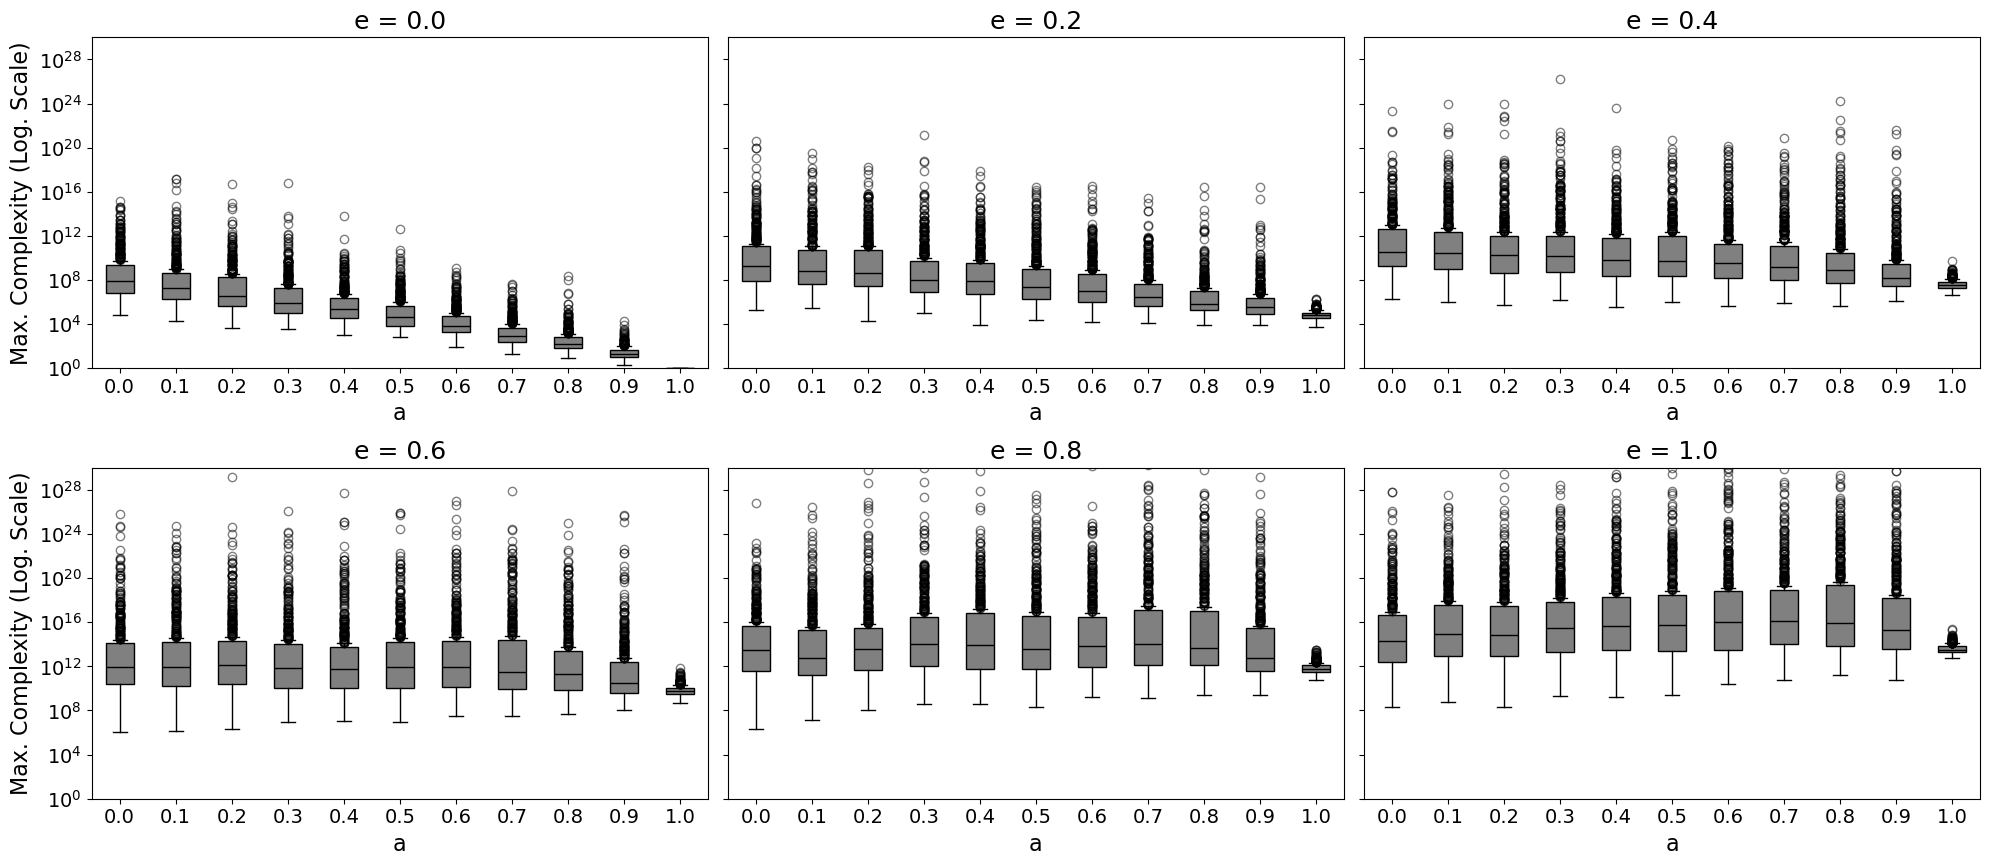

In [192]:
fig, axs = plt.subplots(2, 3, figsize=(20, 9))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Define the exception levels to plot
exception_levels = [i/10 for i in range(0, 11, 2)]

# Determine the common y-axis limits
y_min = filtered_df['max_complexity'].min()
y_max = 1e30 # filtered_df['max_complexity'].max()

for ax, e_level in zip(axs, exception_levels):
    automation_no_exceptions = filtered_df.loc[filtered_df['e'] == e_level]
    boxplot = automation_no_exceptions.boxplot(column='max_complexity', by='a', grid=False, ax=ax, patch_artist=True, boxprops=dict(facecolor='grey', color='black'), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(marker='o', color='black', alpha=0.5))
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'e = {e_level}', fontsize=18)
    ax.set_xlabel('a', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
    if e_level in [0, 0.6]:
        ax.set_ylabel('Max. Complexity (Log. Scale)', fontsize=16)
    else:
        ax.set_yticklabels([])  # Hide y-axis tick labels for other subplots
    plt.suptitle('')  # Suppress the default title to avoid duplication

    # Add a line connecting the medians
    # medians = automation_no_exceptions.groupby('a')['max_complexity'].median()
    # ax.plot(range(1, len(medians) + 1), medians.values, color='black', linestyle='-', linewidth=2)

# fig.suptitle('Max Complexity at Different Degrees of Automations, Different Exception Levels', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig(f'experiment_results/boxplots_max_complexity.pdf', dpi=300, bbox_inches='tight')

print('Max. Complexity at Different Degrees of Automations, Different Exception Levels')
plt.show()

Time to Chaos at Different Degrees of Automations, Different Exception Levels


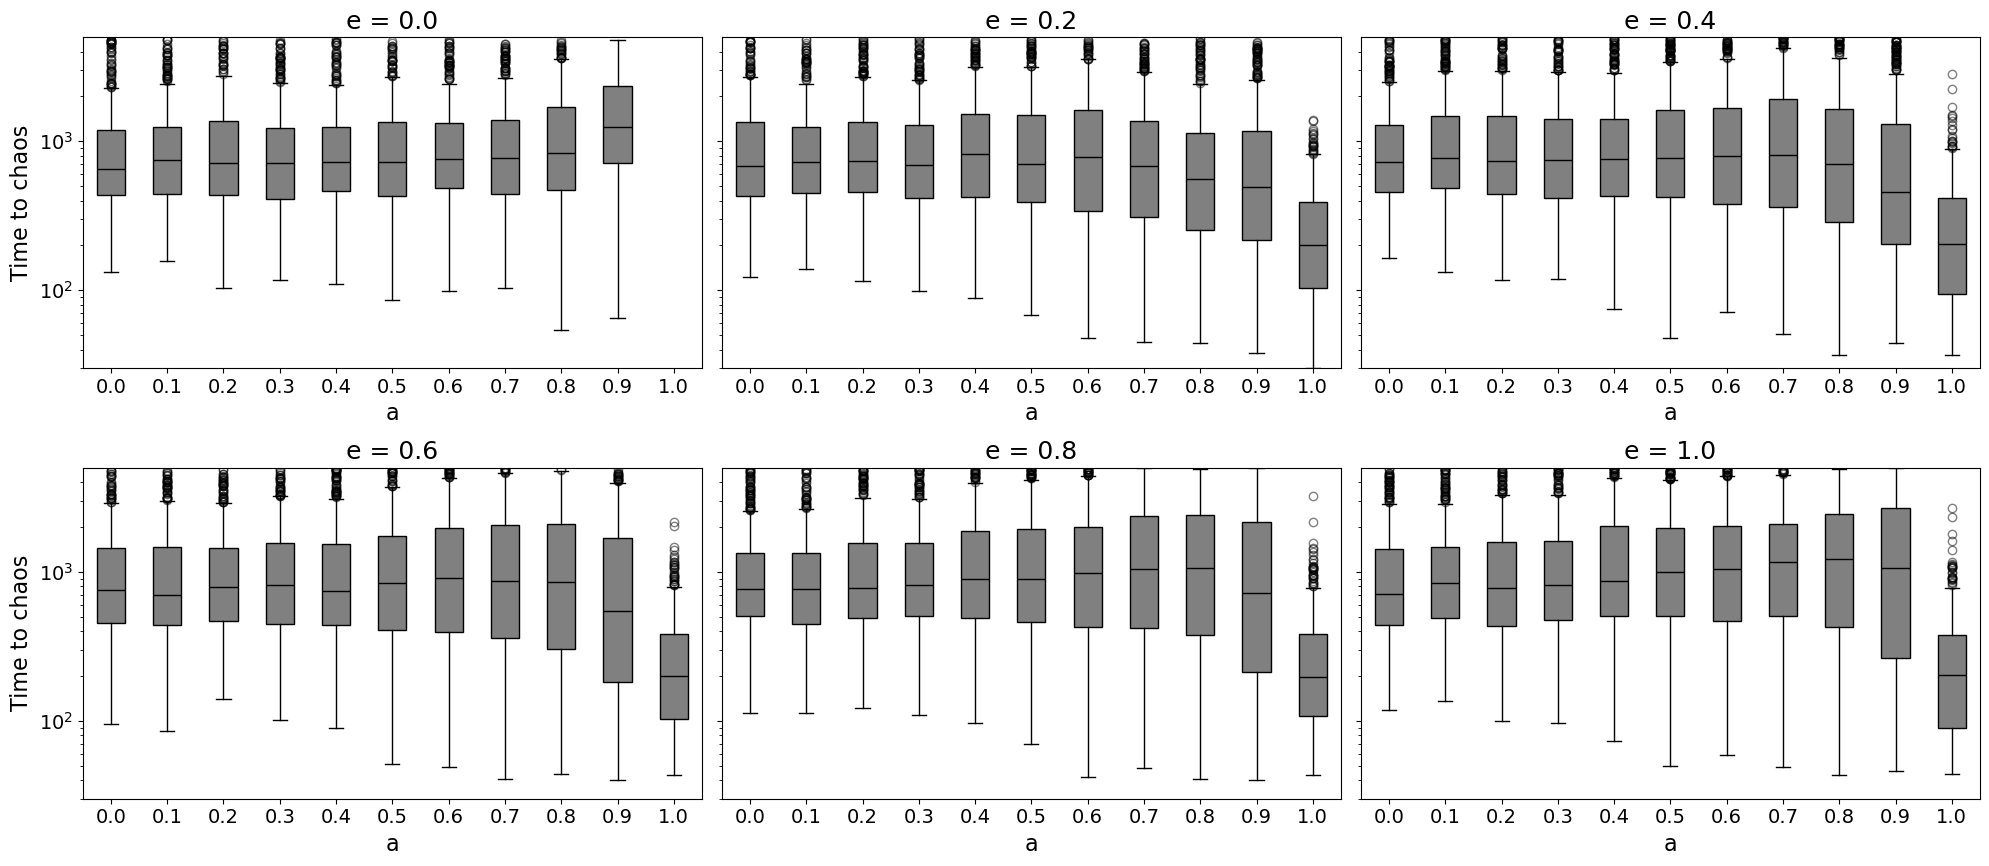

In [193]:
fig, axs = plt.subplots(2, 3, figsize=(20, 9))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Define the exception levels to plot
exception_levels = [i/10 for i in range(0, 11, 2)]

# Determine the common y-axis limits
y_min = filtered_df['time_to_chaos'].min()
y_max = filtered_df['time_to_chaos'].max()

for ax, e_level in zip(axs, exception_levels):
    automation_no_exceptions = filtered_df.loc[filtered_df['e'] == e_level]
    boxplot = automation_no_exceptions.boxplot(column='time_to_chaos', by='a', grid=False, ax=ax, patch_artist=True, boxprops=dict(facecolor='grey', color='black'), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(marker='o', color='black', alpha=0.5))
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'e = {e_level}', fontsize=18)
    ax.set_xlabel('a', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
    if e_level in [0, 0.6]:
        ax.set_ylabel('Time to chaos', fontsize=16)
    else:
        ax.set_yticklabels([])  # Hide y-axis tick labels for other subplots
    plt.suptitle('')  # Suppress the default title to avoid duplication

    # Add a line connecting the medians
    # medians = automation_no_exceptions.groupby('a')['time_to_chaos'].median()
    # ax.plot(range(1, len(medians) + 1), medians.values, color='black', linestyle='-', linewidth=2)

# fig.suptitle('Time to Chaos at Different Degrees of Automations, Different Exception Levels', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig(f'experiment_results/boxplots_time_to_chaos.pdf', dpi=300, bbox_inches='tight')

print('Time to Chaos at Different Degrees of Automations, Different Exception Levels')
plt.show()

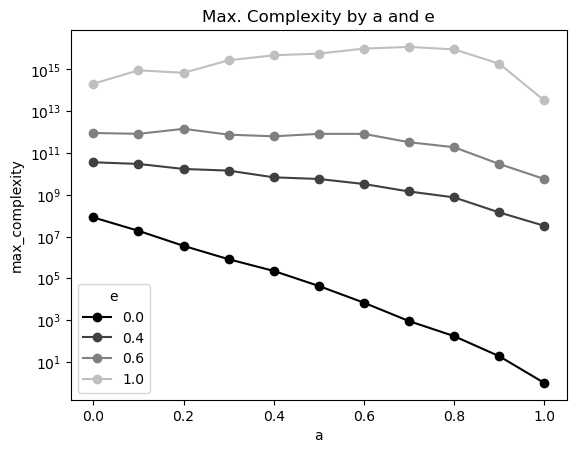

In [194]:
flat_aggregated_df = aggregated_df.reset_index()

filtered_df = flat_aggregated_df.loc[flat_aggregated_df['e'].isin([0, 0.4, 0.6, 1])]

# Create a pivot table to reshape the data for plotting
pivot_df = filtered_df.pivot(index='a', columns='e', values=('max_complexity', 'median'))

# Sort the columns by 'e'
pivot_df = pivot_df.sort_index(axis=1, level=1)

# Generate grey scales for the lines
num_lines = len(pivot_df.columns)
colors = [str(i / float(num_lines)) for i in range(num_lines)]

# Plot the data
ax = pivot_df.plot(kind='line', marker='o', color=colors)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('a')
plt.ylabel('max_complexity')
plt.title('Max. Complexity by a and e')
plt.legend(title='e')

plt.savefig(f'experiment_results/line_median_max_complexity.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

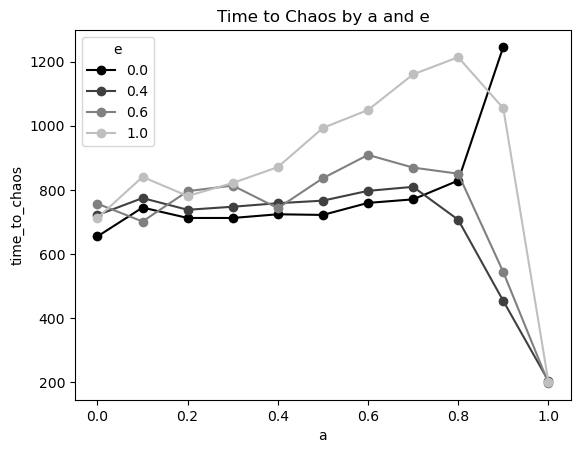

In [195]:
flat_aggregated_df = aggregated_df.reset_index()

filtered_df = flat_aggregated_df.loc[flat_aggregated_df['e'].isin([0, 0.4, 0.6, 1])]

# Create a pivot table to reshape the data for plotting
pivot_df = filtered_df.pivot(index='a', columns='e', values=('time_to_chaos', 'median'))

# Sort the columns by 'e'
pivot_df = pivot_df.sort_index(axis=1, level=1)

# Generate grey scales for the lines
num_lines = len(pivot_df.columns)
colors = [str(i / float(num_lines)) for i in range(num_lines)]

# Plot the data
ax = pivot_df.plot(kind='line', marker='o', color=colors)

# Set the y-axis to logarithmic scale
# ax.set_yscale('log')

# Add labels and title
plt.xlabel('a')
plt.ylabel('time_to_chaos')
plt.title('Time to Chaos by a and e')
plt.legend(title='e')

plt.savefig(f'experiment_results/line_median_time_to_chaos.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Heatmap of Max. Complexity for v_a_e = 0.03 (Median of 500 Runs)


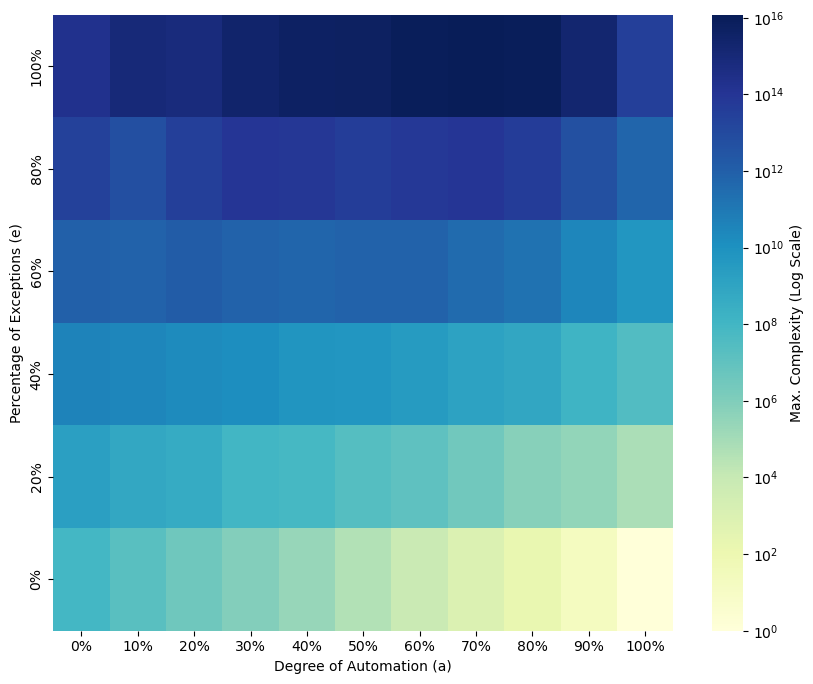

Heatmap of Time to Chaos for v_a_e = 0.03 (Median of 500 Runs)


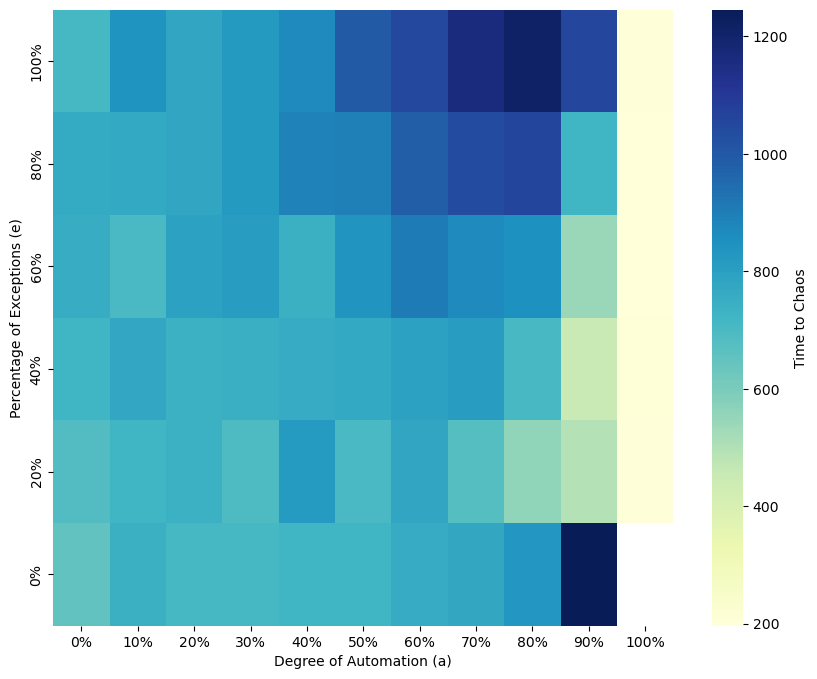

In [196]:
def create_heatmap(df, runs, measure='max_complexity', v_a_e=None, log_scale=True, console_print_title=True):
    measure_text = None
    if measure == 'max_complexity':
        measure_text = 'Max. Complexity'
    elif measure == 'time_to_chaos':
        measure_text = 'Time to Chaos'
    else:
        measure_text = measure

    # Reset the index to flatten the multi-index columns
    flat_aggregated_df = df.reset_index(inplace=False)

    filtered_aggregated_df = flat_aggregated_df
    if v_a_e is not None:
        filtered_aggregated_df = flat_aggregated_df[flat_aggregated_df['v_a_e'] == v_a_e]

    # Ensure the data is numeric
    # filtered_aggregated_df[measure, 'median'] = pd.to_numeric(filtered_aggregated_df[(measure, 'median')], errors='coerce')
    filtered_aggregated_df[measure, 'median'] = pd.to_numeric(filtered_aggregated_df[(measure, 'median')])

    # Pivot the dataframe to get the desired shape for the heatmap
    heatmap_data = filtered_aggregated_df.pivot(index='e', columns='a', values=(measure, 'median')).sort_index(ascending=False)

    # Create the heatmap with logarithmic color scale
    plt.figure(figsize=(10, 8))
    ax = None
    if log_scale:
        ax = sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", norm=LogNorm(), cbar_kws={'label': f'{measure_text} (Log Scale)'})
    else:
        ax = sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", cbar_kws={'label': measure_text})


    # Format the x and y axis as percentages
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

    # Set the correct tick positions
    ax.set_xticks([i + 0.5 for i in range(len(heatmap_data.columns))])
    ax.set_yticks([i + 0.5 for i in range(len(heatmap_data.index))])

    # Set the correct tick labels
    ax.set_xticklabels([f'{int(a*100)}%' for a in heatmap_data.columns])
    ax.set_yticklabels([f'{int(e*100)}%' for e in heatmap_data.index])

    title = None
    if v_a_e is None:
        title = f'Heatmap of {measure_text} (Median of {runs} Runs)'
    else:
        title = f'Heatmap of {measure_text} for v_a_e = {v_a_e} (Median of {runs} Runs)'

    if console_print_title:
        print(title)
    else:
        plt.title(title)
    plt.xlabel('Degree of Automation (a)')
    plt.ylabel('Percentage of Exceptions (e)')
    plt.savefig(f'experiment_results/heatmap_{measure}_{runs}_runs_{str(v_a_e).replace(".", "_")}_v_a_e.pdf', dpi=300, bbox_inches='tight')
    plt.show()

create_heatmap(aggregated_df, 500, 'max_complexity', v_a_e=0.03)
create_heatmap(aggregated_df, 500, 'time_to_chaos', v_a_e=0.03, log_scale=False)

## Sensitivity analysis

In [197]:
sensitivity_all_lines_df = process_simulation.get_results_dataframe("experiment_results/sensitivity_analysis_2.csv")
sensitivity_aggregated_df = process_simulation.aggregate_results(sensitivity_all_lines_df)
sensitivity_aggregated_df

simulation_runs max_complexity  \
                                                        count           mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                    
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   2.556856e+19   
                                          0.2             500   6.623230e+20   
                                      0.5 0.0             500   1.796436e+09   
                                          0.2             500   4.825902e+14   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   2.725443e+13   
...                                                       ...            ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2             500   3.825995e+15   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   6.021956e+15   
                                          0.2             500   2.997819e+17   
                                      0.5 0.0             500   1.407537e+10   
                                          0.2             500   2.412280e+15   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.000000e+08  1.202264e+22   
                                          0.2  2.098164e+09  3.311311e+23   
                                      0.5 0.0  3.997969e+04  5.754399e+11   
                                          0.2  2.290868e+07  1.905461e+17   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.096478e+07  8.317638e+15   
...                                                     ...           ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2  1.202264e+08  1.000000e+18   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  8.317638e+07  2.511886e+18   
                                          0.2  3.311311e+09  1.202264e+20   
                                      0.5 0.0  3.019952e+04  4.365158e+12   
                                          0.2  3.311311e+07  6.918310e+17   

                                                            mean_complexity  \
                                                        std            mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                   
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  5.386701e+20    8.224225e+16   
                                          0.2  1.480863e+22    3.784397e+18   
                                      0.5 0.0  2.693424e+10    2.429568e+07   
                                          0.2  8.601759e+15    3.158567e+12   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  3.964815e+14    1.604426e+11   
...                                                     ...             ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2  4.799405e+16    6.507386e+12   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.134825e+17    5.023066e+13   
                                          0.2  5.456394e+18    2.637040e+15   
                                      0.5 0.0  2.250923e+11    9.241587e+07   
                                          0.2  3.302346e+16    8.002955e+12   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.855221e+06  3.737189e+19   
                                          0.2  3.324283e+07  1.891822e+21   
                                      0.5 0.0  1.471325e+03  7.401713e+09   
                                          0.2  2.290555e+05  1.441770e+15   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  2.128569e+05  4.588914e+13   
...                                                     ...           ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2 

In [198]:
# Set whether to retrieve median, mean or max values
aggregation = 'median'

# Aggregated_df holds the benchmark results
# Get max-complexity for specified conditions
default_setting = {
    't': 5000,
    'l': 100,
    'm': 5,
    'r': 50,
    'n': 5,
    'v_m': 0.005,
    'v_a': 0,
    'v_m_e': 0.01,
    'v_a_e': 0.03
}

scenarios = {
    'Scenario A': {
        'a': 0,
        'e': 0
    }, 
    'Scenario B': {
        'a': 0.5,
        'e': 0
    },
    'Scenario C': {
        'a': 0,
        'e': 0.2
    },
    'Scenario D': {
        'a': 0.5,
        'e': 0.2
    }, 
}

default_max_complexity_scenario_a = sensitivity_aggregated_df.loc[tuple((default_setting | scenarios['Scenario A']).values()), ('max_complexity', aggregation)]
default_max_complexity_scenario_b = sensitivity_aggregated_df.loc[tuple((default_setting | scenarios['Scenario B']).values()), ('max_complexity', aggregation)]
default_max_complexity_scenario_c = sensitivity_aggregated_df.loc[tuple((default_setting | scenarios['Scenario C']).values()), ('max_complexity', aggregation)]
default_max_complexity_scenario_d = sensitivity_aggregated_df.loc[tuple((default_setting | scenarios['Scenario D']).values()), ('max_complexity', aggregation)]

sensitivity_results = []

default_result = {
    'Changed Parameter': None,
    'Low': None,
    'High': None,
    'Delta Low': None,
    'Delta High': None,
    'Max. Complexity Scenario A for Low Value': default_max_complexity_scenario_a,
    'Max. Complexity Scenario B for Low Value': default_max_complexity_scenario_b,
    'Max. Complexity Scenario C for Low Value': default_max_complexity_scenario_c,
    'Max. Complexity Scenario D for Low Value': default_max_complexity_scenario_d,
    'Delta to Default Scenario A for Low Value': None,
    'Delta to Default Scenario B for Low Value': None,
    'Delta to Default Scenario C for Low Value': None,
    'Delta to Default Scenario D for Low Value': None,
    'Max. Complexity Scenario A for High Value': None,
    'Max. Complexity Scenario B for High Value': None,
    'Max. Complexity Scenario C for High Value': None,
    'Max. Complexity Scenario D for High Value': None,
    'Delta to Default Scenario A for High Value': None,
    'Delta to Default Scenario B for High Value': None,
    'Delta to Default Scenario C for High Value': None,
    'Delta to Default Scenario D for High Value': None
}

sensitivity_results.append(default_result)

parameters_to_analyze = default_setting.keys()

for parameter in parameters_to_analyze:
    # get values of the parameter different than in default_settings
    param_values = sensitivity_aggregated_df.index.get_level_values(parameter).unique()
    param_values = param_values[param_values != default_setting[parameter]]

    # get the min and max of the values
    low_param_value = param_values.min()
    high_param_value = param_values.max()
    
    params_scenario_a_low = default_setting | scenarios['Scenario A']
    params_scenario_a_low[parameter] = low_param_value
    params_scenario_b_low = default_setting | scenarios['Scenario B']
    params_scenario_b_low[parameter] = low_param_value
    params_scenario_c_low = default_setting | scenarios['Scenario C']
    params_scenario_c_low[parameter] = low_param_value
    params_scenario_d_low = default_setting | scenarios['Scenario D']
    params_scenario_d_low[parameter] = low_param_value

    params_scenario_a_high = default_setting | scenarios['Scenario A']
    params_scenario_a_high[parameter] = high_param_value
    params_scenario_b_high = default_setting | scenarios['Scenario B']
    params_scenario_b_high[parameter] = high_param_value
    params_scenario_c_high = default_setting | scenarios['Scenario C']
    params_scenario_c_high[parameter] = high_param_value
    params_scenario_d_high = default_setting | scenarios['Scenario D']
    params_scenario_d_high[parameter] = high_param_value

    max_complexity_scenario_a_low = sensitivity_aggregated_df.loc[tuple(params_scenario_a_low.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_b_low = sensitivity_aggregated_df.loc[tuple(params_scenario_b_low.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_c_low = sensitivity_aggregated_df.loc[tuple(params_scenario_c_low.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_d_low = sensitivity_aggregated_df.loc[tuple(params_scenario_d_low.values()), ('max_complexity', aggregation)]
    
    max_complexity_scenario_a_high = sensitivity_aggregated_df.loc[tuple(params_scenario_a_high.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_b_high = sensitivity_aggregated_df.loc[tuple(params_scenario_b_high.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_c_high = sensitivity_aggregated_df.loc[tuple(params_scenario_c_high.values()), ('max_complexity', aggregation)]
    max_complexity_scenario_d_high = sensitivity_aggregated_df.loc[tuple(params_scenario_d_high.values()), ('max_complexity', aggregation)]
    
    print((max_complexity_scenario_a_low - default_max_complexity_scenario_a) / default_max_complexity_scenario_a)

    result = {
        'Changed Parameter': parameter,
        'Low': low_param_value,
        'High': high_param_value,
        'Delta Low': (low_param_value - default_setting[parameter]) / default_setting[parameter],
        'Delta High': (high_param_value - default_setting[parameter]) / default_setting[parameter],
        'Max. Complexity Scenario A for Low Value': max_complexity_scenario_a_low,
        'Max. Complexity Scenario B for Low Value': max_complexity_scenario_b_low,
        'Max. Complexity Scenario C for Low Value': max_complexity_scenario_c_low,
        'Max. Complexity Scenario D for Low Value': max_complexity_scenario_d_low,
        'Delta to Default Scenario A for Low Value': (max_complexity_scenario_a_low - default_max_complexity_scenario_a) / default_max_complexity_scenario_a,
        'Delta to Default Scenario B for Low Value': (max_complexity_scenario_b_low - default_max_complexity_scenario_b) / default_max_complexity_scenario_b,
        'Delta to Default Scenario C for Low Value': (max_complexity_scenario_c_low - default_max_complexity_scenario_c) / default_max_complexity_scenario_c,
        'Delta to Default Scenario D for Low Value': (max_complexity_scenario_d_low - default_max_complexity_scenario_d) / default_max_complexity_scenario_d,
        'Max. Complexity Scenario A for High Value': max_complexity_scenario_a_high,
        'Max. Complexity Scenario B for High Value': max_complexity_scenario_b_high,
        'Max. Complexity Scenario C for High Value': max_complexity_scenario_c_high,
        'Max. Complexity Scenario D for High Value': max_complexity_scenario_d_high,
        'Delta to Default Scenario A for High Value': (max_complexity_scenario_a_high - default_max_complexity_scenario_a) / default_max_complexity_scenario_a,
        'Delta to Default Scenario B for High Value': (max_complexity_scenario_b_high - default_max_complexity_scenario_b) / default_max_complexity_scenario_b,
        'Delta to Default Scenario C for High Value': (max_complexity_scenario_c_high - default_max_complexity_scenario_c) / default_max_complexity_scenario_c,
        'Delta to Default Scenario D for High Value': (max_complexity_scenario_d_high - default_max_complexity_scenario_d) / default_max_complexity_scenario_d
    }

    sensitivity_results.append(result)

# Convert the dictionary to a dataframe
sensitivity_results_df = pd.DataFrame(sensitivity_results)

# Display the dataframe
display(sensitivity_results_df)

0.20226443461741309
-0.8681743261443593
0.0
-0.8903521803856813
0.20226443461741309
-0.7245771296661825
0.4454397707459221
0.7378008287493764
0.20226443461741309


C:\Users\Lennart\AppData\Local\Temp\ipykernel_35884\474658704.py:115: RuntimeWarning: divide by zero encountered in scalar divide
  'Delta Low': (low_param_value - default_setting[parameter]) / default_setting[parameter],
C:\Users\Lennart\AppData\Local\Temp\ipykernel_35884\474658704.py:116: RuntimeWarning: divide by zero encountered in scalar divide
  'Delta High': (high_param_value - default_setting[parameter]) / default_setting[parameter],


,Changed Parameter,Low,High,Delta Low,Delta High,Max. Complexity Scenario A for Low Value,Max. Complexity Scenario B for Low Value,Max. Complexity Scenario C for Low Value,Max. Complexity Scenario D for Low Value,Delta to Default Scenario A for Low Value,Delta to Default Scenario B for Low Value,Delta to Default Scenario C for Low Value,Delta to Default Scenario D for Low Value,Max. Complexity Scenario A for High Value,Max. Complexity Scenario B for High Value,Max. Complexity Scenario C for High Value,Max. Complexity Scenario D for High Value,Delta to Default Scenario A for High Value,Delta to Default Scenario B for High Value,Delta to Default Scenario C for High Value,Delta to Default Scenario D for High Value
0,None,NaN,NaN,NaN,NaN,8.317638e+07,43651.583224,1.905461e+09,2.290868e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,t,4500.0000,5500.0000,-0.1,0.1,1.000000e+08,39979.694351,2.098164e+09,2.290868e+07,0.202264,-0.084118,0.101132,-1.626148e-16,8.317638e+07,30199.517204,3.311311e+09,3.311311e+07,0.000000,-0.308169,0.737801,4.454398e-01
2,l,90.0000,110.0000,-0.1,0.1,1.096478e+07,14454.397707,2.511886e+08,5.248075e+06,-0.868174,-0.668869,-0.868174,-7.709132e-01,1.004245e+09,75857.757503,2.511886e+10,1.202264e+08,11.073675,0.737801,12.182567,4.248075e+00
3,m,4.0000,6.0000,-0.2,0.2,8.317638e+07,52480.746025,3.646191e+09,3.981072e+07,0.000000,0.202264,0.913548,7.378008e-01,8.317638e+07,43651.583224,2.522548e+09,2.290868e+07,0.000000,0.000000,0.323852,-1.626148e-16
4,r,45.0000,55.0000,-0.1,0.1,9.120108e+06,12022.644346,2.089296e+08,4.365158e+06,-0.890352,-0.724577,-0.890352,-8.094539e-01,3.997969e+08,91201.083936,2.511886e+10,1.202264e+08,3.806616,1.089296,12.182567,4.248075e+00
5,n,4.0000,6.0000,-0.2,0.2,1.000000e+08,36307.805477,2.290868e+09,3.311311e+07,0.202264,-0.168236,0.202264,4.454398e-01,8.317638e+07,36307.805477,3.311311e+09,2.290868e+07,0.000000,-0.168236,0.737801,-1.626148e-16
6,v_m,0.0045,0.0055,-0.1,0.1,2.290868e+07,12022.644346,7.585776e+08,1.207367e+07,-0.724577,-0.724577,-0.601893,-4.729650e-01,4.365158e+08,120736.746735,8.317638e+09,2.290868e+07,4.248075,1.765919,3.365158,-1.626148e-16
7,v_a,0.0010,0.0010,inf,inf,1.202264e+08,75857.757503,3.311311e+09,2.290868e+07,0.445440,0.737801,0.737801,-1.626148e-16,1.202264e+08,75857.757503,3.311311e+09,2.290868e+07,0.445440,0.737801,0.737801,-1.626148e-16
8,v_m_e,0.0090,0.0110,-0.1,0.1,1.445440e+08,30199.517204,1.584893e+09,1.451575e+07,0.737801,-0.308169,-0.168236,-3.663645e-01,1.202264e+08,30199.517204,4.786301e+09,2.754229e+07,0.445440,-0.308169,1.511886,2.022644e-01
9,v_a_e,0.0270,0.0330,-0.1,0.1,1.000000e+08,36307.805477,2.754229e+09,7.585776e+06,0.202264,-0.168236,0.445440,-6.688689e-01,8.317638e+07,30199.517204,3.032770e+09,3.981072e+07,0.000000,-0.308169,0.591620,7.378008e-01


In [199]:
-36.6 % -16.8

-3.0

In [200]:
header_tuples = [
    ('Param. Values','All scenarios','Low'),
    ('Param. Values','All scenarios','High'),
    ('Param. Values','All scenarios','Δ Low'),
    ('Param. Values','All scenarios','Δ High'),
    ('Max. Complexity','Scenario A','Low'),
    ('Max. Complexity','Scenario A','High'),
    ('Max. Complexity','Scenario A','Δ Low'),
    ('Max. Complexity','Scenario A','Δ High'),
    ('Max. Complexity','Scenario B','Low'),
    ('Max. Complexity','Scenario B','High'),
    ('Max. Complexity','Scenario B','Δ Low'),
    ('Max. Complexity','Scenario B','Δ High'),
    ('Max. Complexity','Scenario C','Low'),
    ('Max. Complexity','Scenario C','High'),
    ('Max. Complexity','Scenario C','Δ Low'),
    ('Max. Complexity','Scenario C','Δ High'),
    ('Max. Complexity','Scenario D','Low'),
    ('Max. Complexity','Scenario D','High'),
    ('Max. Complexity','Scenario D','Δ Low'),
    ('Max. Complexity','Scenario D','Δ High')
]
multi_index=pd.MultiIndex.from_tuples(header_tuples)

df = pd.DataFrame(columns=multi_index)
df.index.name = 'Param.'

for index, row in sensitivity_results_df.iterrows():
    df.loc[row['Changed Parameter']] = [
        f"{row['Low']:,.3g}", f"{row['High']:,.3g}",
        f"{row['Delta Low'] * 100:,.1f}%", f"{row['Delta High'] * 100:,.1f}%",
        f"{row['Max. Complexity Scenario A for Low Value']:.2e}", f"{row['Max. Complexity Scenario A for High Value']:.2e}",
        f"{row['Delta to Default Scenario A for Low Value'] * 100:,.1f}%", f"{row['Delta to Default Scenario A for High Value'] * 100:,.1f}%",
        f"{row['Max. Complexity Scenario B for Low Value']:.2e}", f"{row['Max. Complexity Scenario B for High Value']:.2e}",
        f"{row['Delta to Default Scenario B for Low Value'] * 100:,.1f}%", f"{row['Delta to Default Scenario B for High Value'] * 100:,.1f}%",
        f"{row['Max. Complexity Scenario C for Low Value']:.2e}", f"{row['Max. Complexity Scenario C for High Value']:.2e}",
        f"{row['Delta to Default Scenario C for Low Value'] * 100:,.1f}%", f"{row['Delta to Default Scenario C for High Value'] * 100:,.1f}%",
        f"{row['Max. Complexity Scenario D for Low Value']:.2e}", f"{row['Max. Complexity Scenario D for High Value']:.2e}",
        f"{row['Delta to Default Scenario D for Low Value'] * 100:,.1f}%", f"{row['Delta to Default Scenario D for High Value'] * 100:,.1f}%"
    ]

df

Param. Values                         Max. Complexity            \
       All scenarios                              Scenario A             
                 Low     High   Δ Low Δ High             Low      High   
Param.                                                                   
None             nan      nan    nan%   nan%        8.32e+07       nan   
t            4.5e+03  5.5e+03  -10.0%  10.0%        1.00e+08  8.32e+07   
l                 90      110  -10.0%  10.0%        1.10e+07  1.00e+09   
m                  4        6  -20.0%  20.0%        8.32e+07  8.32e+07   
r                 45       55  -10.0%  10.0%        9.12e+06  4.00e+08   
n                  4        6  -20.0%  20.0%        1.00e+08  8.32e+07   
v_m           0.0045   0.0055  -10.0%  10.0%        2.29e+07  4.37e+08   
v_a            0.001    0.001    inf%   inf%        1.20e+08  1.20e+08   
v_m_e          0.009    0.011  -10.0%  10.0%        1.45e+08  1.20e+08   
v_a_e          0.027    0.033  -10.0%  10.0%        1.00e+08  8.32e+07   

                                                                          \
                         Scenario B                           Scenario C   
         Δ Low    Δ High        Low      High   Δ Low  Δ High        Low   
Param.                                                                     
None      nan%      nan%   4.37e+04       nan    nan%    nan%   1.91e+09   
t        20.2%      0.0%   4.00e+04  3.02e+04   -8.4%  -30.8%   2.10e+09   
l       -86.8%  1,107.4%   1.45e+04  7.59e+04  -66.9%   73.8%   2.51e+08   
m         0.0%      0.0%   5.25e+04  4.37e+04   20.2%    0.0%   3.65e+09   
r       -89.0%    380.7%   1.20e+04  9.12e+04  -72.5%  108.9%   2.09e+08   
n        20.2%      0.0%   3.63e+04  3.63e+04  -16.8%  -16.8%   2.29e+09   
v_m     -72.5%    424.8%   1.20e+04  1.21e+05  -72.5%  176.6%   7.59e+08   
v_a      44.5%     44.5%   7.59e+04  7.59e+04   73.8%   73.8%   3.31e+09   
v_m_e    73.8%     44.5%   3.02e+04  3.02e+04  -30.8%  -30.8%   1.58e+09   
v_a_e    20.2%      0.0%   3.63e+04  3.02e+04  -16.8%  -30.8%   2.75e+09   

                                                                         
                                   Scenario D                            
            High   Δ Low    Δ High        Low      High   Δ Low  Δ High  
Param.                                                                   
None         nan    nan%      nan%   2.29e+07       nan    nan%    nan%  
t       3.31e+09   10.1%     73.8%   2.29e+07  3.31e+07   -0.0%   44.5%  
l       2.51e+10  -86.8%  1,218.3%   5.25e+06  1.20e+08  -77.1%  424.8%  
m       2.52e+09   91.4%     32.4%   3.98e+07  2.29e+07   73.8%   -0.0%  
r       2.51e+10  -89.0%  1,218.3%   4.37e+06  1.20e+08  -80.9%  424.8%  
n       3.31e+09   20.2%     73.8%   3.31e+07  2.29e+07   44.5%   -0.0%  
v_m     8.32e+09  -60.2%    336.5%   1.21e+07  2.29e+07  -47.3%   -0.0%  
v_a     3.31e+09   73.8%     73.8%   2.29e+07  2.29e+07   -0.0%   -0.0%  
v_m_e   4.79e+09  -16.8%    151.2%   1.45e+07  2.75e+07  -36.6%   20.2%  
v_a_e   3.03e+09   44.5%     59.2%   7.59e+06  3.98e+07  -66.9%   73.8%

In [201]:
# Create LaTeX text
latex_text = df.to_latex(escape=False)

# Replace percentage figures and unicode characters
latex_text = latex_text.replace('nan%', r'-')
latex_text = latex_text.replace('nan', r'-')
latex_text = latex_text.replace('NaN', r'-')
latex_text = latex_text.replace('%', r'\%')
latex_text = latex_text.replace('Δ', r'$\Delta$')
latex_text = latex_text.replace('_', r'\_')


# Save to file
with open('experiment_results/sensitivity_analysis_table.tex', 'w') as f:
    f.write(latex_text)

In [202]:
# Create LaTeX text for Scenario A and B
latex_text_ab = df.iloc[:, :12].to_latex(escape=False)

# Replace percentage figures and unicode characters
latex_text_ab = latex_text_ab.replace('nan%', r'-')
latex_text_ab = latex_text_ab.replace('nan', r'-')
latex_text_ab = latex_text_ab.replace('NaN', r'-')
latex_text_ab = latex_text_ab.replace('%', r'\%')
latex_text_ab = latex_text_ab.replace('Δ', r'$\Delta$')
latex_text_ab = latex_text_ab.replace('_', r'\_')

# Save to file
with open('experiment_results/sensitivity_analysis_table_ab.tex', 'w') as f:
    f.write(latex_text_ab)

# Create LaTeX text for Scenario C and D
latex_text_cd = df.iloc[:, 12:].to_latex(escape=False)

# Replace percentage figures and unicode characters
latex_text_cd = latex_text_cd.replace('nan%', r'-')
latex_text_cd = latex_text_cd.replace('nan', r'-')
latex_text_cd = latex_text_cd.replace('NaN', r'-')
latex_text_cd = latex_text_cd.replace('%', r'\%')
latex_text_cd = latex_text_cd.replace('Δ', r'$\Delta$')
latex_text_cd = latex_text_cd.replace('_', r'\_')

# Save to file
with open('experiment_results/sensitivity_analysis_table_cd.tex', 'w') as f:
    f.write(latex_text_cd)

# Analysis regarding the effect of edges on complexity metric

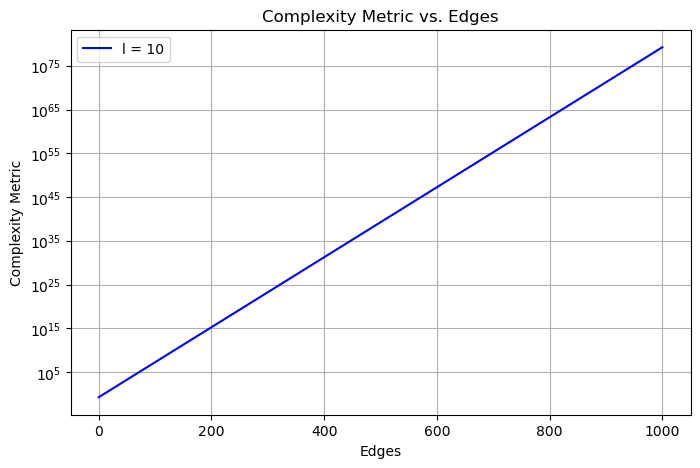

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def get_complexity_metric(l, edges):
    return 10**(0.08 + 0.08 * edges - 0.08 * l)

# Define the range for edges (0 to 1000) and a fixed l value
edges_values = np.arange(0, 1001, 1)  # Edges from 0 to 1000
l_fixed = 10  # Example fixed value for l

# Compute complexity metric
complexity_values = [get_complexity_metric(l_fixed, e) for e in edges_values]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(edges_values, complexity_values, label=f'l = {l_fixed}', color='blue')
plt.xlabel('Edges')
plt.ylabel('Complexity Metric')
plt.title('Complexity Metric vs. Edges')
plt.yscale('log')  # Log scale due to exponential growth
plt.legend()
plt.grid()
plt.show()

In [204]:
# example, effect of one additional in % on the complexity metric

cm_100_edges = get_complexity_metric(l, 100)
cm_101_edges = get_complexity_metric(l, 101)

print(f"At 100 edges, one additional edge increases the complexity score by {cm_101_edges-cm_100_edges:,.3f} ({(cm_101_edges-cm_100_edges)/cm_100_edges * 100:,.1f}%)")

cm_150_edges = get_complexity_metric(l, 100)
cm_151_edges = get_complexity_metric(l, 99)
print(f"At 100 edges, one edge less decreases the complexity score by {cm_151_edges-cm_150_edges:,.3f} ({(cm_151_edges-cm_150_edges)/cm_150_edges * 100:,.1f}%)")

print("Percentage wise, increases and deductions remain constant for all edge counts.")

At 100 edges, one additional edge increases the complexity score by 0.243 (20.2%)
At 100 edges, one edge less decreases the complexity score by -0.202 (-16.8%)
Percentage wise, increases and deductions remain constant for all edge counts.


## Section for trying things out

In [205]:
import math

def get_edges_for_result(result, l):
    return (math.log10(result) - 0.08 + 0.08 * l) / 0.08

def get_complexity(edges, l):
    return 10**(0.08 + 0.08 * edges - 0.08 * l)

sensitivity_aggregated_df['median_edges'] = [get_edges_for_result(median_complexity, 100) for median_complexity in sensitivity_aggregated_df[("max_complexity", "median")]]
sensitivity_all_lines_df['edges'] = [get_edges_for_result(median_complexity, 100) for median_complexity in sensitivity_all_lines_df['max_complexity']]

In [206]:
sensitivity_aggregated_df

simulation_runs max_complexity  \
                                                        count           mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                    
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   2.556856e+19   
                                          0.2             500   6.623230e+20   
                                      0.5 0.0             500   1.796436e+09   
                                          0.2             500   4.825902e+14   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   2.725443e+13   
...                                                       ...            ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2             500   3.825995e+15   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0             500   6.021956e+15   
                                          0.2             500   2.997819e+17   
                                      0.5 0.0             500   1.407537e+10   
                                          0.2             500   2.412280e+15   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.000000e+08  1.202264e+22   
                                          0.2  2.098164e+09  3.311311e+23   
                                      0.5 0.0  3.997969e+04  5.754399e+11   
                                          0.2  2.290868e+07  1.905461e+17   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.096478e+07  8.317638e+15   
...                                                     ...           ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2  1.202264e+08  1.000000e+18   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  8.317638e+07  2.511886e+18   
                                          0.2  3.311311e+09  1.202264e+20   
                                      0.5 0.0  3.019952e+04  4.365158e+12   
                                          0.2  3.311311e+07  6.918310e+17   

                                                            mean_complexity  \
                                                        std            mean   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                   
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  5.386701e+20    8.224225e+16   
                                          0.2  1.480863e+22    3.784397e+18   
                                      0.5 0.0  2.693424e+10    2.429568e+07   
                                          0.2  8.601759e+15    3.158567e+12   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  3.964815e+14    1.604426e+11   
...                                                     ...             ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2  4.799405e+16    6.507386e+12   
5500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.134825e+17    5.023066e+13   
                                          0.2  5.456394e+18    2.637040e+15   
                                      0.5 0.0  2.250923e+11    9.241587e+07   
                                          0.2  3.302346e+16    8.002955e+12   

                                                                           \
                                                     median           max   
t    l   m r  n v_m   v_a v_m_e v_a_e a   e                                 
4500 100 5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  1.855221e+06  3.737189e+19   
                                          0.2  3.324283e+07  1.891822e+21   
                                      0.5 0.0  1.471325e+03  7.401713e+09   
                                          0.2  2.290555e+05  1.441770e+15   
5000 90  5 50 5 0.005 0.0 0.01  0.03  0.0 0.0  2.128569e+05  4.588914e+13   
...                                                     ...           ...   
     110 5 50 5 0.005 0.0 0.01  0.03  0.5 0.2 

In [207]:
# Filter rows where 'edges' is not an integer
import numpy as np
non_integer_edges_df = sensitivity_all_lines_df[np.modf(sensitivity_all_lines_df['edges'])[0] != 0]
non_integer_edges_df['edges']

1        201.0
6        228.0
10       195.0
12       252.0
13       218.0
         ...  
35991    207.0
35993    252.0
35994    234.0
35997    206.0
35998    230.0
Name: edges, Length: 10756, dtype: float64

In [208]:
non_integer_edges_df = sensitivity_all_lines_df[
    sensitivity_all_lines_df['edges'].apply(lambda x: not abs(x - round(x)) < 1e-13)
]
non_integer_edges_df

,t,l,m,r,n,v_m,v_a,v_m_e,v_a_e,a,e,seed,computation_time,version,max_complexity,mean_complexity,has_phase_change,time_to_chaos,edges


In [209]:
if sensitivity_aggregated_df[('simulation_runs', 'count')].min() < 500: "Some paramter settings have been computed less than 500 times"

In [210]:
# # investigate whether v_a really has no effect on peak complexity in scenario d

print("Default scenario A")
display(sensitivity_aggregated_df.loc[(5000, 100, 5, 50, 5, 0.005, 0, 0.01, 0.03, 0, 0)])

print("v_a_e modulation scenario A")
display(sensitivity_aggregated_df.loc[(5000, 100, 5, 50, 5, 0.005, 0, 0.01, 0.027, 0, 0)])
ams_1 = process_simulation.ProcessSimulationModel(5000, 100, 5, 50, 5, 0.005, 0, 0.01, 0.03, 0, 0, 2081879244).run_simulation()
result_1 = process_simulation.get_aggregate_sim_result(ams_1)
ams_2 = process_simulation.ProcessSimulationModel(5000, 100, 5, 50, 5, 0.01, 0.001, 0.01, 0.04, 0, 0, 2081879244).run_simulation()
result_2 = process_simulation.get_aggregate_sim_result(ams_2)

display(result_1 = result_2)

Default scenario A


simulation_runs   count                       500
max_complexity    mean       6991210454480.052734
                  median          83176377.110267
                  max         1318256738556399.25
                  std       69084512290861.914062
mean_complexity   mean         64230454893.032158
                  median           1338860.882715
                  max       14322856816011.314453
                  std         700738121349.900879
has_phase_change  mean                      0.822
                  median                      1.0
                  max                        True
                  std                    0.382896
time_to_chaos     mean                   1014.668
                  median                    655.0
                  max                      4813.0
                  std                  967.998492
median_edges                                198.0
Name: (5000, 100, 5, 50, 5, 0.005, 0.0, 0.01, 0.03, 0.0, 0.0), dtype: object

v_a_e modulation scenario A


simulation_runs   count                       500
max_complexity    mean          670954929132135.0
                  median              100000000.0
                  max        158489319246111104.0
                  std         10018939167452524.0
mean_complexity   mean       2758815061229.626465
                  median           1659974.514555
                  max         606394423524580.125
                  std       37795281593561.117188
has_phase_change  mean                      0.828
                  median                      1.0
                  max                        True
                  std                    0.377758
time_to_chaos     mean                   1093.186
                  median                    739.0
                  max                      4957.0
                  std                  998.986861
median_edges                                199.0
Name: (5000, 100, 5, 50, 5, 0.005, 0.0, 0.01, 0.027, 0.0, 0.0), dtype: object

In [211]:
ams_1 = process_simulation.ProcessSimulationModel(5000,100,5,50,4,0.005,0,0.01,0.03,0.5,0.2,1050914803).run_simulation()
result_1 = process_simulation.get_aggregate_sim_result(ams_1)

display(result_1)

{'max_complexity': 251188643.1509572,
 'mean_complexity': np.float64(2237317.780130282),
 'has_phase_change': False,
 'time_to_chaos': np.int64(996)}

In [212]:
# test whether some sensitivity results match with the simulation model
filtered_sensitivity_all_lines_df = sensitivity_all_lines_df[
    (sensitivity_all_lines_df['t'] == 5000) &
    (sensitivity_all_lines_df['l'] == 100) &
    (sensitivity_all_lines_df['m'] == 5) &
    (sensitivity_all_lines_df['r'] == 50) &
    (sensitivity_all_lines_df['n'] == 5) &
    (sensitivity_all_lines_df['v_m'] == 0.005) &
    (sensitivity_all_lines_df['v_a'] == 0) &
    (sensitivity_all_lines_df['v_m_e'] == 0.01) &
    (sensitivity_all_lines_df['v_a_e'] == 0.03) &
    (sensitivity_all_lines_df['a'] == 0.5) &
    (sensitivity_all_lines_df['e'] == 0.2)
]

filtered_sensitivity_all_lines_df = filtered_sensitivity_all_lines_df.sort_values(by=['max_complexity'], ignore_index=True)

row_lower_median = filtered_sensitivity_all_lines_df.iloc[249]
row_upper_median = filtered_sensitivity_all_lines_df.iloc[250]

result = filtered_sensitivity_all_lines_df['max_complexity'].median()
default_complexity_recorded = result

# test whether some sensitivity results match with the simulation model
filtered_sensitivity_all_lines_df = sensitivity_all_lines_df[
    (sensitivity_all_lines_df['t'] == 5000) &
    (sensitivity_all_lines_df['l'] == 100) &
    (sensitivity_all_lines_df['m'] == 5) &
    (sensitivity_all_lines_df['r'] == 50) &
    (sensitivity_all_lines_df['n'] == 5) &
    (sensitivity_all_lines_df['v_m'] == 0.005) &
    (sensitivity_all_lines_df['v_a'] == 0) &
    (sensitivity_all_lines_df['v_m_e'] == 0.009) &
    (sensitivity_all_lines_df['v_a_e'] == 0.03) &
    (sensitivity_all_lines_df['a'] == 0.5) &
    (sensitivity_all_lines_df['e'] == 0.2)
]

filtered_sensitivity_all_lines_df = filtered_sensitivity_all_lines_df.sort_values(by=['max_complexity'], ignore_index=True)

row_lower_median = filtered_sensitivity_all_lines_df.iloc[249]
row_upper_median = filtered_sensitivity_all_lines_df.iloc[250]

result = filtered_sensitivity_all_lines_df['max_complexity'].median()

vme_complexity_recorded = result


In [213]:
# analysis of number of edges in scenario d
default_number_edges = 191
default_complexity_calculated = get_complexity(default_number_edges, 100)
default_complexity_recorded = default_complexity_recorded
print(f"At {default_number_edges} edges recorded {default_complexity_recorded:g} but should have had {default_complexity_calculated:g}.")

vme_number_edges = 188.5
vme_complexity_calculated = get_complexity(vme_number_edges, 100)
vme_complexity_recorded = vme_complexity_recorded
print(f"At {vme_number_edges} edges recorded {vme_complexity_recorded:g} but should have had {vme_complexity_calculated:g}.")

At 191 edges recorded 2.29087e+07 but should have had 2.29087e+07.
At 188.5 edges recorded 1.45157e+07 but should have had 1.44544e+07.


In [214]:
print("Recorded difference")
(vme_complexity_recorded - default_complexity_recorded)/default_complexity_recorded

Recorded difference


np.float64(-0.36636454587195366)

In [215]:
print("Calcualted difference")
(vme_complexity_calculated - default_complexity_calculated)/default_complexity_calculated

Calcualted difference


-0.36904265551980825

In [216]:
# expected value
max_complexity_1885 = get_complexity_metric()

TypeError: get_complexity_metric() missing 2 required positional arguments: 'l' and 'edges'

In [ ]:
66.9 % 16.8

16.500000000000004

In [ ]:
for level in range(sensitivity_aggregated_df.index.nlevels):
    if level == 'version'
    print(f"Level {level}: {sensitivity_aggregated_df.index.get_level_values(level).unique()}")
    
for index in sensitivity_aggregated_df.index:
    max_complexity_median = sensitivity_aggregated_df.loc[index, ('max_complexity', 'median')]
    print(f"Index: {index}, Max Complexity Median: {max_complexity_median}")

Level 0: Index([0.03], dtype='float64', name='version')
Level 1: Index([4500, 5000], dtype='int64', name='t')
Level 2: Index([100, 90, 110], dtype='int64', name='l')
Level 3: Index([5, 4, 6], dtype='int64', name='m')
Level 4: Index([50, 45, 55], dtype='int64', name='r')
Level 5: Index([5, 4, 6], dtype='int64', name='n')
Level 6: Index([0.005, 0.0045, 0.0055], dtype='float64', name='v_m')
Level 7: Index([0.0, 0.001], dtype='float64', name='v_a')
Level 8: Index([0.01, 0.009, 0.011], dtype='float64', name='v_m_e')
Level 9: Index([0.03, 0.027, 0.033], dtype='float64', name='v_a_e')
Level 10: Index([0.0, 0.2], dtype='float64', name='e')
Level 11: Index([0.0, 0.5], dtype='float64', name='a')
Index: (0.03, 4500, 100, 5, 50, 5, 0.005, 0.0, 0.01, 0.03, 0.0, 0.0), Max Complexity Median: 100000000.0
Index: (0.03, 4500, 100, 5, 50, 5, 0.005, 0.0, 0.01, 0.03, 0.0, 0.5), Max Complexity Median: 39979.69435051341
Index: (0.03, 4500, 100, 5, 50, 5, 0.005, 0.0, 0.01, 0.03, 0.2, 0.0), Max Complexity Medi

In [ ]:
simulation_results_df = process_simulation.get_results_dataframe("results_v_a_e_variation.csv")

# delete results from old version
filtered_df = simulation_results_df.loc[
    simulation_results_df['version'] == process_simulation.VERSION
]

def aggreated_results_df(df):
    # aggregate results with same parameters
    grouped_df = df.groupby(['version', 't', 'l', 'm', 'r', 'n', 'v_m', 'v_a', 'v_m_e', 'v_a_e', 'e', 'a'])

    aggregated_df = grouped_df.agg({
        'seed': 'count',
        'max_complexity': ['mean', 'median', 'max', 'std'],
        'mean_complexity': ['mean', 'median', 'max', 'std'],
        'has_phase_change': ['mean', 'median', 'max', 'std'],
        'time_to_chaos': ['mean', 'median', 'max', 'std']
    }).rename(columns={'seed': 'simulation_runs'})

    aggregated_df.rename(columns={'sim_id': 'simulation_runs'}, inplace=True)
    return aggregated_df

aggregated_df = aggreated_results_df(filtered_df)

display(aggregated_df)

FileNotFoundError: [Errno 2] No such file or directory: 'results_v_a_e_variation.csv'

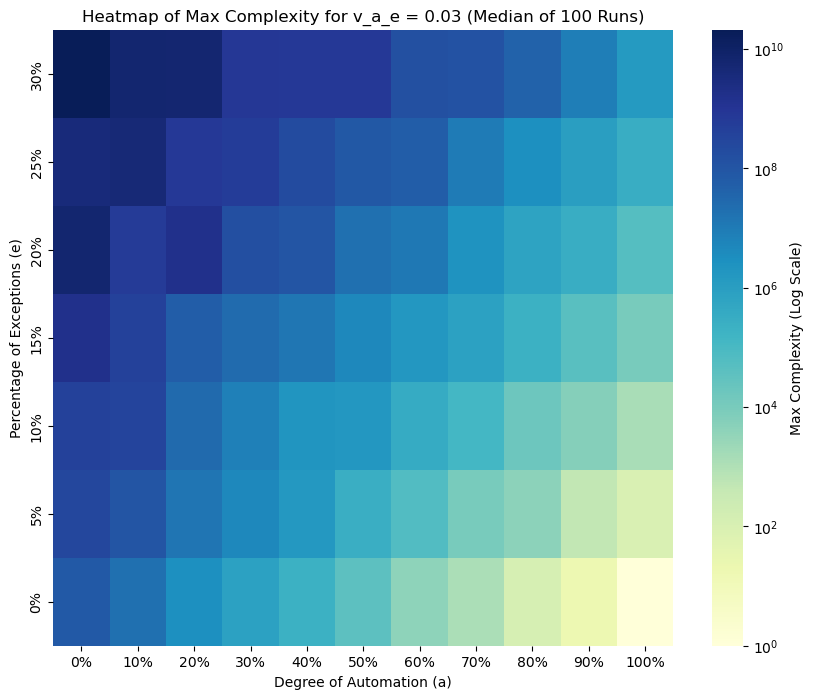

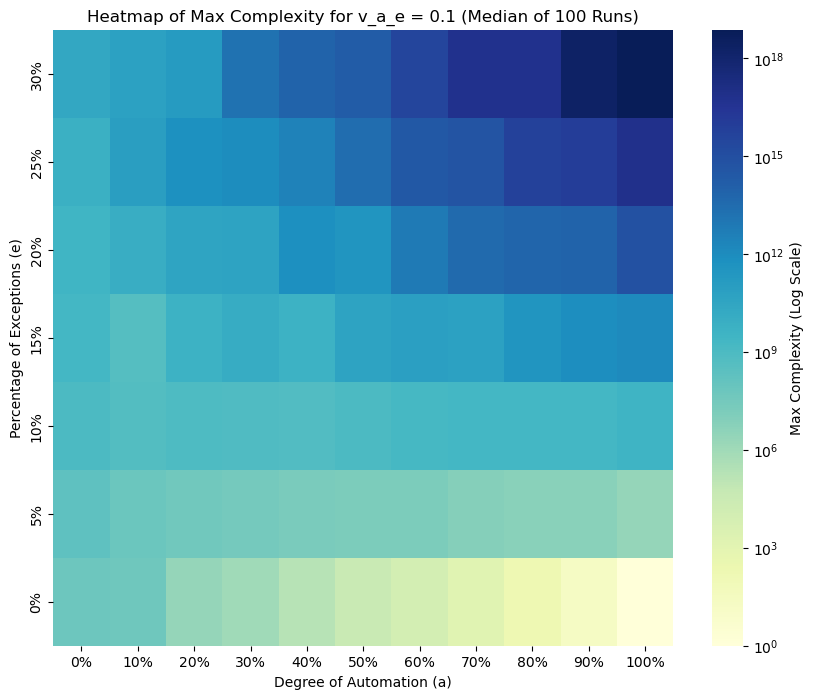

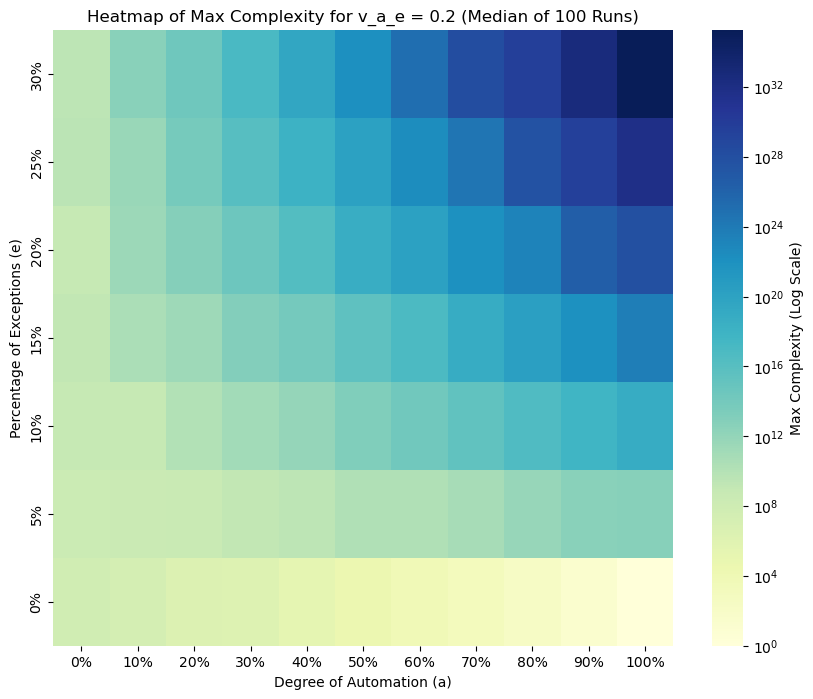

In [ ]:
create_heatmap(aggregated_df, 100, v_a_e=0.03)
create_heatmap(aggregated_df, 100, v_a_e=0.1)
create_heatmap(aggregated_df, 100, v_a_e=0.2)

In [ ]:
# estimation of turning point for ideal degree of automation
def p_jump_activity(a, e, v_a, v_m, v_a_e, v_m_e):
    return a * (1 - e) * v_a + (1 - a) * (1-e) * v_m + a * e * v_a_e + (1 - a) * e * v_m_e

# exceptions are given
# v_a_e is given
# what would be a (the ideal degree of automation)

avg_remembered_jumps = l * r * p_jump_activity(a, e, v_a, v_m, 0.05, v_m_e)
avg_remembered_jumps

53.74999999999999

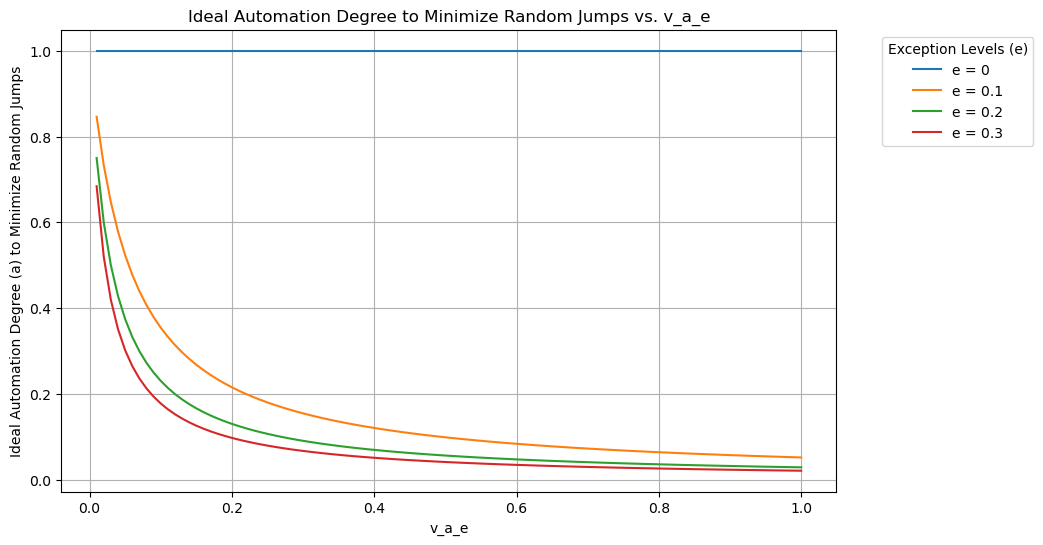

In [ ]:
import numpy as np

def get_ideal_automation_degree(e, v_a, v_m, v_a_e, v_m_e):
    return ((1 - e) * v_m + e * v_m_e) / ((1 - e) * v_a + e * v_a_e + (1 - e) * v_m + e * v_m_e)

# Define the range of v_a_e values
v_a_e_values = np.linspace(0.01, 1, 100)

# Calculate the ideal automation degree for each v_a_e value
e_values = [0, 0.1, 0.2, 0.3]
ideal_automation_degrees_dict = {e: [get_ideal_automation_degree(e=e, v_a=0, v_m=0.005, v_a_e=v_a_e, v_m_e=0.01) for v_a_e in v_a_e_values] for e in e_values}

# Plot the results
plt.figure(figsize=(10, 6))
for e, ideal_automation_degrees in ideal_automation_degrees_dict.items():
    plt.plot(v_a_e_values, ideal_automation_degrees, label=f'e = {e}')
plt.xlabel('v_a_e')
plt.ylabel('Ideal Automation Degree (a) to Minimize Random Jumps')
plt.title('Ideal Automation Degree to Minimize Random Jumps vs. v_a_e')
plt.grid(True)
plt.legend(title='Exception Levels (e)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(f'experiment_results/line_optimal_automation_to_surpress_jumps.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
get_ideal_automation_degree(e=0.1, v_a=0, v_m=0.005, v_a_e=0.03, v_m_e=0.01)

0.6470588235294118

## Comparisson of Complexity metrics

In [ ]:
f = plt.figure()
ax = results_df_norm.plot(title="Complexity Over Time, Different Measures")
ax.set_ylabel("normalized complexity measure")
legend = plt.legend(title='Complexity Measure', bbox_to_anchor=(1.0, 1.0))
legend_frame = legend.get_frame()
legend_frame.set_facecolor('white')

plt.savefig('experiment_results/plot_complexity_measures.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

NameError: name 'results_df_norm' is not defined

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='time'>

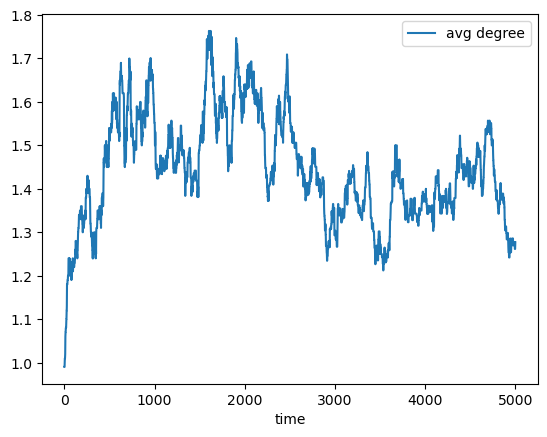

In [ ]:
results_df.plot(y='avg degree')

<Axes: xlabel='time'>

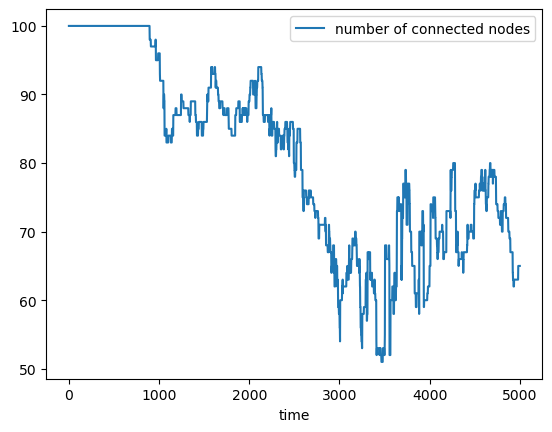

In [ ]:
results_df.plot(y='number of connected nodes')

## Plot some graphs at different times    

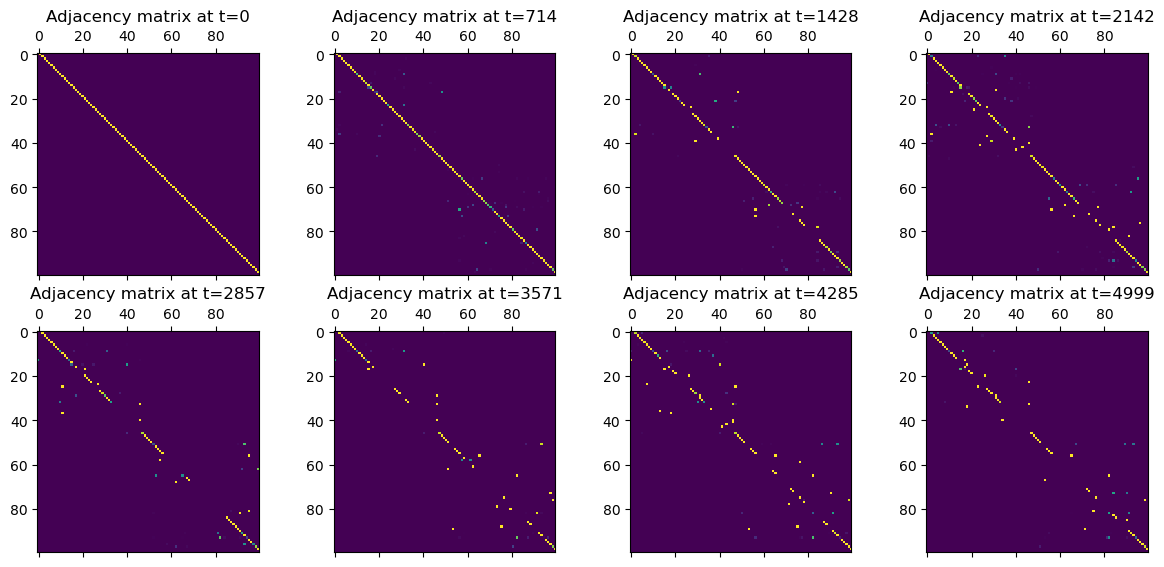

In [ ]:
process_simulation.visualize_adjacency_matrices(adjacency_matrices, 4, 2, title=None)

In [ ]:
# get metrics for simulation that can be compared to Pentland
aggregate_sim_result = process_simulation.get_aggregate_sim_result(adjacency_matrices, l)
aggregate_sim_result

{'max_complexity': 1318.25673855641,
 'mean_complexity': np.float64(105.54255655232866),
 'has_phase_change': True,
 'time_to_chaos': np.int64(487)}

## Load computed simulations

In [ ]:
# get all simulations results as dataframe
output_file = 'experiment_results/simulation_results.csv'
simulation_results_df = process_simulation.get_results_dataframe(output_file)

## Analyze results

### Read simulation results from df

In [ ]:
one_result_per_line_df = simulation_results_df

# delete results from old version
filtered_df = one_result_per_line_df.loc[
    one_result_per_line_df['version'] == process_simulation.VERSION
]

# aggregate results with same parameters
grouped_df = filtered_df.groupby(['version', 't', 'l', 'm', 'r', 'n', 'v_m', 'v_a', 'v_m_e', 'v_a_e', 'e', 'a'])

aggregated_df = grouped_df.agg({
    'seed': 'count',
    'max_complexity': ['mean', 'max', 'std'],
    'mean_complexity': ['mean', 'max', 'std'],
    'has_phase_change': ['mean', 'max', 'std'],
    'time_to_chaos': ['mean', 'max', 'std']
}).rename(columns={'seed': 'simulation_runs'})

aggregated_df.rename(columns={'sim_id': 'simulation_runs'}, inplace=True)

display(aggregated_df)

simulation_runs  \
                                                                 count   
version t    l   m r  n v_m   v_a v_m_e v_a_e e    a                     
0.02    5000 100 5 50 5 0.005 0   0.01  0.03  0.00 0.0             100   
                                                   0.1             100   
                                                   0.2             100   
                                              0.05 0.0             100   
                                                   0.1             100   
                                                   0.2             100   
                                              0.10 0.0             100   
                                                   0.1             100   
                                                   0.2              88   
                                              0.15 0.0             100   
                                                   0.1             100   
                                              0.20 0.0             100   
                                                   0.1             100   
                                              0.25 0.0             100   
                                                   0.1             100   
                                              0.30 0.0             100   
                                                   0.1             100   

                                                       max_complexity  \
                                                                 mean   
version t    l   m r  n v_m   v_a v_m_e v_a_e e    a                    
0.02    5000 100 5 50 5 0.005 0   0.01  0.03  0.00 0.0   5.599706e+13   
                                                   0.1   5.329124e+10   
                                                   0.2   6.434892e+10   
                                              0.05 0.0   2.120483e+16   
                                                   0.1   1.199163e+15   
                                                   0.2   5.231029e+10   
                                              0.10 0.0   2.128413e+15   
                                                   0.1   3.105695e+14   
                                                   0.2   1.263113e+13   
                                              0.15 0.0   7.784592e+14   
                                                   0.1   4.828896e+12   
                                              0.20 0.0   1.318372e+19   
                                                   0.1   2.205042e+14   
                                              0.25 0.0   3.981237e+21   
                                                   0.1   9.138145e+16   
                                              0.30 0.0   2.512347e+20   
                                                   0.1   2.224360e+17   

                                                                      \
                                                                 max   
version t    l   m r  n v_m   v_a v_m_e v_a_e e    a                   
0.02    5000 100 5 50 5 0.005 0   0.01  0.03  0.00 0.0  2.754229e+15   
                                                   0.1  3.019952e+12   
                                                   0.2  5.248075e+12   
                                              0.05 0.0  2.089296e+18   
                                                   0.1  1.096478e+17   
                                                   0.2  2.089296e+12   
                                              0.10 0.0  1.584893e+17   
                                                   0.1  3.019952e+16   
                                                   0.2  1.096478e+15   
                                              0.15 0.0  3.630781e+16   
                                                   0.1  4.365158e+14   
                                              0.20 0.0  1.318257e+21   
                                 

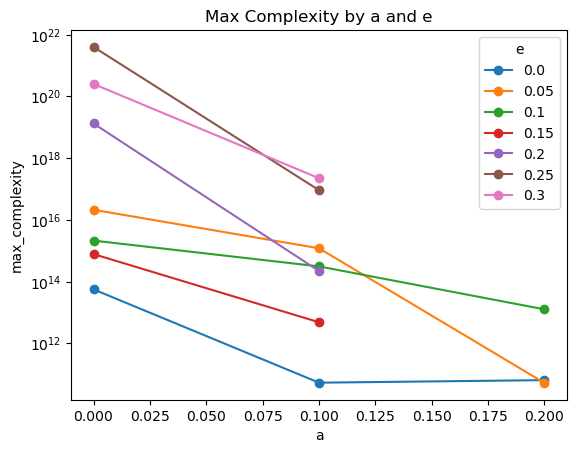

In [ ]:
flat_aggregated_df = aggregated_df.reset_index()

# plot max complexity

# Create a pivot table to reshape the data for plotting
pivot_df = flat_aggregated_df.pivot(index='a', columns='e', values=('max_complexity', 'mean'))

# Plot the data
ax = pivot_df.plot(kind='line', marker='o')

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('a')
plt.ylabel('max_complexity')
plt.title('Max Complexity by a and e')
plt.legend(title='e')

# Show the plot
plt.show()

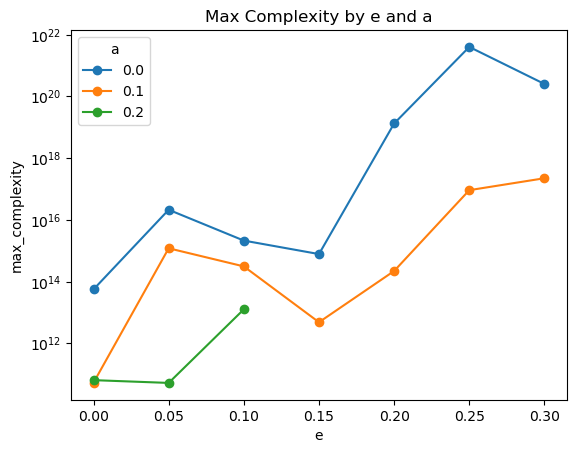

In [ ]:
flat_aggregated_df = aggregated_df.reset_index()

# plot max complexity

# Create a pivot table to reshape the data for plotting
pivot_df = flat_aggregated_df.pivot(index='e', columns='a', values=('max_complexity', 'mean'))

# Plot the data
ax = pivot_df.plot(kind='line', marker='o')

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('e')
plt.ylabel('max_complexity')
plt.title('Max Complexity by e and a')
plt.legend(title='a')

# Show the plot
plt.show()

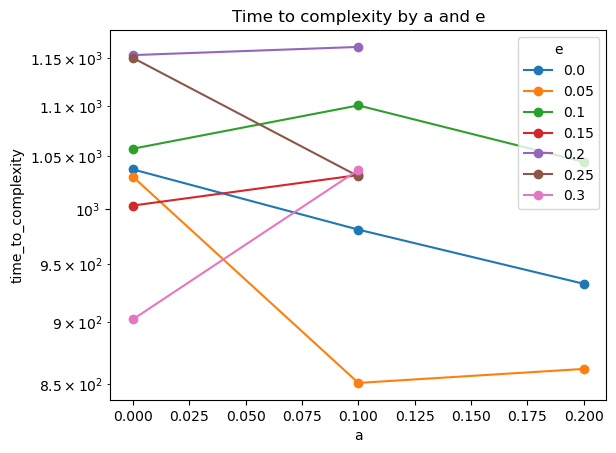

In [ ]:

# plot time to complexity

# Create a pivot table to reshape the data for plotting
pivoted_flat_df = flat_aggregated_df.pivot(index='a', columns='e', values=('time_to_chaos', 'mean'))

# Plot the data
ax = pivoted_flat_df.plot(kind='line', marker='o')

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('a')
plt.ylabel('time_to_complexity')
plt.title('Time to complexity by a and e')
plt.legend(title='e')

# Show the plot
plt.show()